https://drive.google.com/file/d/14WaQ2-0xoz_N8N6itYY697QSJnrUyN9g/view?usp=sharing

# COGS 108 - EDA Checkpoint

## Permissions


Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

[ ] YES - make available


[X] NO - keep private


## Overview

In our research, we aim to examine how the monthly rental rate per square foot in the specific regions of California (those with more than 2000 rental houses) in 2020 may be impacted by the housing factors of of parking and laundry options (ie. what kinds of parking & laundry are available to renters) as well as the pet policies (ie. are dogs or cats allowed in housing), and this is achieved through our investigation and analysis of the data associated with the housing rental market. In our project, we derived the dataset, which provides information about the housing rental market in the US in the year of 2020, containing the data of the monthly rental rates of different housing types across the cities in different US states and various housing features and  conditions, including the size, accessibility, and equipment of the houses, as well the particular policy associated with the rental agreement, which can all potentially affect the monthly rental rates. Through the exploratory data analysis and statistical tests, we discover that the average monthly rental rates in all of the selected cities in California in 2020 that have more than 2000 rental houses are impacted by each of  the following variables of the housing factors and pet policies: “pets_allowed,” “parking_options,” and “laundry_options.” Yet, as we focused on each of these cities, we cannot find statistically significant results that can demonstrate the relationship between the monthly rental rates and each of the aforementioned variables.

# Names

- Lihao Liu
- Zhenjian Wang
- Qinyi Zhang
- Jialong Guo
- Zehui Zhang


<a id='research_question'></a>
# Research Question

How do the housing factors of parking and laundry options (ie. what kinds of parking & laundry are available to renters) as well as the pet policies (ie. are dogs or cats allowed in housing) affect the rental rates per square foot in different regions in California in the year of 2020?

<a id='Background & Prior Work'></a>
# Background & Prior Work


### Introduction

Introduction:
Housing rental price has been a critical economic factor that the public pays attention to in recent decades as it is constantly fluctuating and significantly influenced by the areas in which the houses are situated, qualities/conditions of the houses, and other socio-political/economical factors. The indication of how the housing conditions, including the size, accessibility, and equipment of the houses, as well as the housing options and policies may affect the price of housing rentals is particularly useful and important to those who are moving into the new areas and temporarily living there, such as college students, people traveling for business purpose, and so forth, as it provides critical information that enables those people to make the economically appropriate decisions on what particular kinds of houses they shall lease. Therefore, judging from the aforementioned point, the topic of how the  housing rental market can be potentially impacted by those factors as mentioned above seems to be highly relatable to us as well as many other college students. In our research, we aim to examine whether there is a relationship between the monthly housing rental price and the qualities and conditions of the houses–ie. the physical attributes of the houses for rent–including the housing factors of parking & laundry options (ie. what kinds of parking & laundry are available to renters) and the pet policies (ie. are dogs or cats allowed in housing) through the investigation and analysis of the data associated with the housing rental market.

### Prior Work

In the USA housing regression report made by Oguzhan Ulus, the author conducts several EDA analysis to show the distribution of each variable and build a linear regression model, XGBRegressor,a GradientBoostingRegressor, and RandomForestRegressor to predict the price of a house .He also uses a train-test split to set 30 percent of the data as the test set and 70 percent of the data as the training set. The simple linear regression model uses all the variables except price as the input, and the result shows that a random forest regressor is the best model to predict the price of a house. We learned that the price is probably correlated to some other variables in the dataset. However, our research question is to explore the relationship between parking and laundry options (ie. what kinds of parking & laundry are available to renters), the pet policies (ie. are dogs or cats allowed in housing) and the rental rates per square foot in different regions in California, which is different from the purpose of the USA housing regression report.

According to ‘Housing Price Prediction’ we found from Kaggle, they have a correlation matrix constructed using a seaborn heatmap analyzed for all data in the dataset. There is a strong correlation between car_allowed and dog_allowed,  bedroom and bathroom numbers. Then other variables all have less than |0.2| correction indicated in the matrix. And correlation with price is all 0s. Then one bathroom, laundry options w/d in unit, not furnished, 2 bedrooms are the most common ones in this data pool. Then they created a linear regression, and used machine learning to train the model in order to predict the housing price from all other factors.

### Reference

1.https://www.kaggle.com/fikretulus/usa-housing-regression

2.https://www.kaggle.com/vpkprasanna/house-price-prediction/notebook

# Hypothesis


We predict that parking and laundry options (ie. what kinds of parking & laundry are available to renters) and the pet policies (ie. are dogs or cats allowed in housing) affect rental rates. 

There may be other confounding factors like locations of the houses, such as regions and states. Also, squarefeet is another important confounding factor.



# Dataset

Dataset Name: USA Housing Listings

Link to the Dataset: https://www.kaggle.com/austinreese/usa-housing-listings/code

Number of Observations: 33085

Dataset Description: 
The Original Dataset: The dataset provides information about the housing rental market in the US in the year 2020, containing the data on the monthly rental price of different housing types across the cities in different states in the US and various housing features/factors. The dataset contains 22 features/variables. However, for our project, we are only using six features with emphasis on four of them. 
Project Dataset: The variables being utilized in our project include the housing factors of parking & laundry options (ie. what kinds of parking & laundry are available to renters) and the pet policies (ie. are dogs or cats allowed in housing), which are employed as the predictor variables in our dataset. In our dataset, these housing factors, correspondingly, are presented as “laundry_options,” “parking_options,” and “pets_allowed,” and all of them are categorical data. It is worth mentioning that for the variable of “pets_allowed,” it combines the observations of both “dogs_allowed” and “cats_allowed” that are shown on the original dataset, and they are indicated by booleans: True for pets being allowed, and False for pets being unhallowed. Besides, for the variable of “laundry_options,” it contains some observations with the abbreviated names: “w/d” as “washer/dryer.” In addition, the variables being utilized also include the variable of the monthly rental housing prices across different regions in California in 2020 (in dollars), which is employed as the outcome variable and presented as “price” in our  dataset. So far, these four aforementioned variables are the target variables that are emphasized in our data analysis. The rest of the variables being utilized in our dataset include “regions,” which include the observations of the locations of the houses, and “sqfeet,” which indicate the size of the houses in square feet. Last but not least, through the process of data cleaning, we created a new variable named “rental_rates/sqft,” (in dollars) which is obtained by dividing the rental price/rate by the housing square foot, and stored it in our dataset.

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import patsy
import statsmodels.api as sm
from matplotlib import rcParams
import scipy as sp



# Data Cleaning

### Import dataset and clean up table
We import the datafile into the Jupyter Notebook. The dataset include varies of factors including the detailed information of different houses in the US.
The main contributing factors for our question would be "region," "laundry_options," "parking_option," "pets_allowed," and "rental_rates/sqft." in _California_.
So we clean up table to these columns ONLY.


In [2]:
#import data file
df_origin = pd.read_csv("housing.csv")

#clean up with necessary column only
df = df_origin[["region","price","sqfeet","cats_allowed","dogs_allowed","laundry_options","parking_options","state"]]
df

#limit the region into california only.
df = df[df["state"] == "ca"]
df.drop(columns = ["state"],inplace = True)
df.head()

region  price  sqfeet  cats_allowed  dogs_allowed  laundry_options  \
0  reno / tahoe   1148    1078             1             1      w/d in unit   
1  reno / tahoe   1200    1001             0             0      w/d hookups   
2  reno / tahoe   1813    1683             1             1      w/d in unit   
3  reno / tahoe   1095     708             1             1      w/d in unit   
4  reno / tahoe    289     250             1             1  laundry on site   

   parking_options  
0          carport  
1          carport  
2  attached garage  
3          carport  
4              NaN

### Drop Null value


In [3]:
df.isnull().sum()

region                0
price                 0
sqfeet                0
cats_allowed          0
dogs_allowed          0
laundry_options    5067
parking_options    8503
dtype: int64

Based on the output above, we have numbers of null value for column _laundry_options_ and _parking_options_. Because they are non-numeric data, hence we replace the data with "Unknown"

In [4]:
# fill the null values
df["parking_options"].value_counts()
df.parking_options = df.parking_options.fillna('Unknown')
df.laundry_options = df.laundry_options.fillna('Unknown')

### Pets Allowed adjuestment

The houses which allow both cats and dogs are considered as "pets-allowed", which means _pets_allowed_ is true when it is 2, while 0 and 1 are both false.

In [5]:
# we want to replace dogs_allowed and cats_allowed with our new column, pets allowed
df["pets_allowed"] = df["cats_allowed"] + df["dogs_allowed"]

# the houses wich allow both cat and dog are considered as pets allowed.
df["pets_allowed"] = df["pets_allowed"].apply(lambda x:True if x == 2 else False)

# true value means that the house is friendly for dogs AND cats. 
df["pets_allowed"].value_counts()

True     21301
False    11784
Name: pets_allowed, dtype: int64

In [6]:
# drop the previous column for cats and dogs
df.drop(columns = ["cats_allowed","dogs_allowed"],inplace = True)

### Eliminate  Outliers

Based on the dataset scatterplot for sqfeet and price, we have some obvious outliers. We will eliminated the outliers in the following steps.

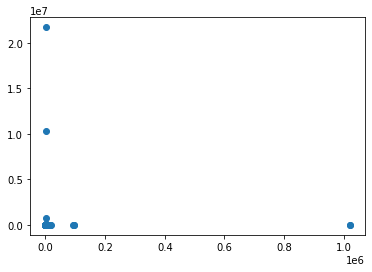

In [7]:
plt.scatter(df["sqfeet"],df["price"])

Based on the IQR we gain from calculation, we observe from scatterplot that we failed to eliminate outliers according to IQR we calculated. Hence we need adjust the lower and upper limit for the column to gain a better result according to the scaterplot distribution..

In [8]:
#Finding the 25 percentile and 75 percentile for Squarefeet.
Q1 = np.quantile(df["sqfeet"],0.25)
Q3 = np.quantile(df["sqfeet"],0.75)
IQR = Q3 - Q1
IQR

lower_limit_sqfeet = 20
#np.median(df["sqfeet"]) - 1.5 * IQR
upper_limit_sqfeet = 10000
#np.median(df["sqfeet"]) + 1.5 * IQR

print(upper_limit_sqfeet)
print(lower_limit_sqfeet)

10000
20


In [9]:
#Finding the 25 percentile and 75 percentile for Price.
Q1a = np.quantile(df["price"],0.25)
Q3a = np.quantile(df["price"],0.75)
IQRa = Q3 - Q1
IQRa

lower_limit_price = 20
#np.median(df["price"]) - 1.5 * IQRa
upper_limit_price = 25000
#np.median(df["price"]) + 1.5 * IQRa

In [10]:
df = df[(df["price"].between(lower_limit_price, upper_limit_price)) & (df["sqfeet"].between(lower_limit_sqfeet,upper_limit_sqfeet))]

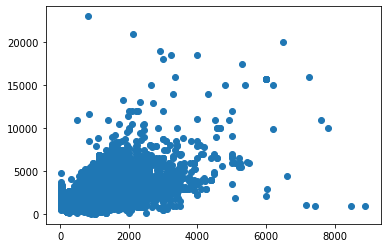

In [11]:
# we change our lower and upper limit several times to make sure there is no outlier
plt.scatter(df["sqfeet"],df["price"])

### Get rental rate

Set rental rate = price/sqft to get the unit price, for a more direct comparision between housing price in different region with different space occupied.

In [12]:
df["rental_rates/sqft"] = df["price"] / df["sqfeet"]
df.drop(columns = ["price","sqfeet"], inplace = True)

### Overview

In [13]:
df.head()

region  laundry_options  parking_options  pets_allowed  \
0  reno / tahoe      w/d in unit          carport          True   
1  reno / tahoe      w/d hookups          carport         False   
2  reno / tahoe      w/d in unit  attached garage          True   
3  reno / tahoe      w/d in unit          carport          True   
4  reno / tahoe  laundry on site          Unknown          True   

   rental_rates/sqft  
0           1.064935  
1           1.198801  
2           1.077243  
3           1.546610  
4           1.156000

In [14]:
df.dtypes

region                object
laundry_options       object
parking_options       object
pets_allowed            bool
rental_rates/sqft    float64
dtype: object

In [15]:
df.isnull().sum()

region               0
laundry_options      0
parking_options      0
pets_allowed         0
rental_rates/sqft    0
dtype: int64

# Data Analysis & Results 

## EDA

### Distributions of variables

In this part, we are trying to visualize the distribution of each variable.

We could see that ventura county, stockton, and inland empire are the top three regions where the houses are located. More than half of the regions have more than 1000 houses listed in the dataset.

Text(0, 0.5, 'region names')

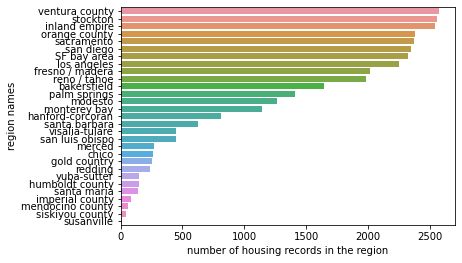

In [16]:
sns.countplot(y="region", data=df, order = df['region'].value_counts().index)
plt.xlabel("number of housing records in the region")
plt.ylabel("region names")

We could see that most houses have washer or dryer within the unit. There are only few houses that do not have laundry on site. 

Text(0, 0.5, 'number of houses that have that option')

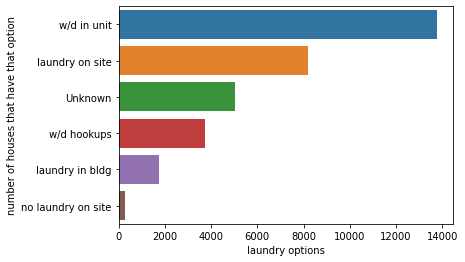

In [17]:
sns.countplot(y="laundry_options", data=df,order = df['laundry_options'].value_counts().index)
plt.xlabel("laundry options")
plt.ylabel("number of houses that have that option")

We could see that most houses have carport. We have a relatively large number of unknown which we may need to exclude later in the further analysis. 

Text(0, 0.5, 'number of houses that have that option')

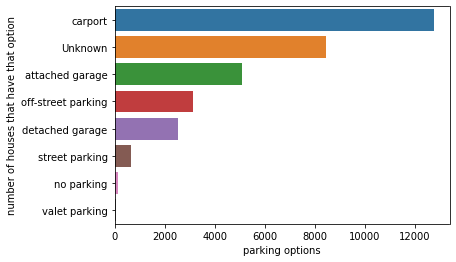

In [18]:
sns.countplot(y="parking_options", data=df, order = df['parking_options'].value_counts().index)
plt.xlabel("parking options")
plt.ylabel("number of houses that have that option")

We could see that the number of houses that allow pets is almost double than the number of houses that do not allow pets.

Text(0, 0.5, 'number of houses that have that option')

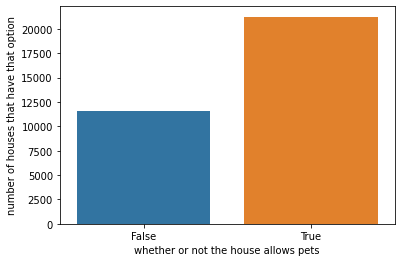

In [19]:
sns.countplot(x="pets_allowed", data=df)
plt.xlabel("whether or not the house allows pets")
plt.ylabel("number of houses that have that option")

We times the monthly rental rates per square feet by 12 and get the rental rates per year per square feet in order to make the data bigger and easy to plot. From the plot we could see that most of our houses are in the price range of 15-35 dollars per year per square feet. As the price goes up, there are more house available.There are so outlier and we will deal with them later

In [20]:
df["rental_rates_yearly/sqft"] = df["rental_rates/sqft"] * 12

Text(-2.575000000000003, 0.5, 'number of houses that have that is in that range')

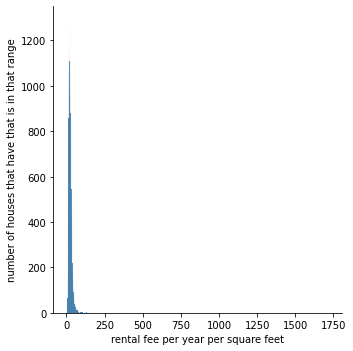

In [21]:
sns.displot(df, x="rental_rates_yearly/sqft")
plt.xlabel("rental fee per year per square feet")
plt.ylabel("number of houses that have that is in that range")

### Outliers


-- By Jim Frost

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Unfortunately, all analysts will confront outliers and be forced to make decisions about what to do with them. Given the problems they can cause, you might think that it’s best to remove them from your data. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant.

##### Outliers in our dataset: rental_rates/sqft

<AxesSubplot:xlabel='rental_rates/sqft', ylabel='Count'>

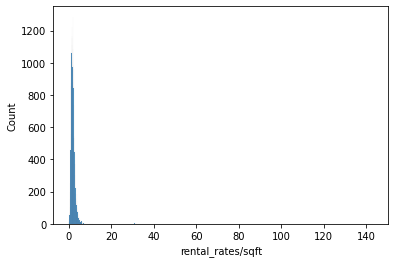

In [22]:
sns.histplot(data = df["rental_rates/sqft"])

As shown above, there must be some extremely large values within the rental_rates that causes such skewed histogram.Thus, we decide to get rid of the large values to 1. make the histgram more decent and 2. make sure our results are statistically significant. Using formula "limit = median(data) +/- 1.5 * IQR", we come up with the lower limit and the upper limit of the rental_rates/sqft data. We will generate the new histogram and see how the new distribution looks.

In [23]:
Q1b = np.quantile(df["rental_rates/sqft"],0.25)
Q3b = np.quantile(df["rental_rates/sqft"],0.75)
IQRb = Q3b - Q1b
IQRb

lower_limit_rental_rates = np.median(df["rental_rates/sqft"]) - 1.5 * IQRb
#np.median(df["rental_rates/sqft"]) - 1.5 * IQR
upper_limit_rental_rates = np.median(df["rental_rates/sqft"]) + 1.5 * IQRb
#np.median(df["rental_rates/sqft"]) + 1.5 * IQR

print(upper_limit_rental_rates)
print(lower_limit_rental_rates)

3.4786751501134443
0.3696394566281289


Now we have value of lower limit of rental rates about 0.3688 and value of upper limit about 3.4770, let's refine the dataframe to be those whose rental_rates/sqft are less than the upper limit and larger than the lower limit.

In [24]:
df = df[(df["rental_rates/sqft"] < upper_limit_rental_rates) & (df["rental_rates/sqft"] > lower_limit_rental_rates)]
df.head()

region  laundry_options  parking_options  pets_allowed  \
0  reno / tahoe      w/d in unit          carport          True   
1  reno / tahoe      w/d hookups          carport         False   
2  reno / tahoe      w/d in unit  attached garage          True   
3  reno / tahoe      w/d in unit          carport          True   
4  reno / tahoe  laundry on site          Unknown          True   

   rental_rates/sqft  rental_rates_yearly/sqft  
0           1.064935                 12.779221  
1           1.198801                 14.385614  
2           1.077243                 12.926916  
3           1.546610                 18.559322  
4           1.156000                 13.872000

Now let's generate a histogram of the dataset without outliers.

<AxesSubplot:xlabel='rental_rates/sqft', ylabel='Count'>

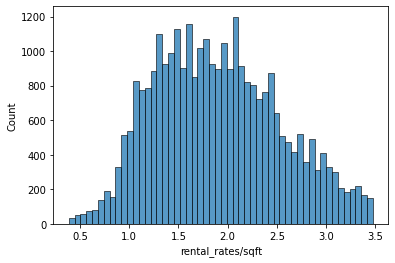

In [25]:
sns.histplot(data = df["rental_rates/sqft"])

Now the distribution looks pretty good and resembles normal distribution.

### Relationship between variables

So as to focus on the relationship between region and rental_rates/sqft first, we need to chek the value counts first.

In [26]:
df.region.value_counts()

ventura county      2539
inland empire       2515
stockton            2509
sacramento          2357
orange county       2268
san diego           2185
fresno / madera     2002
reno / tahoe        1984
los angeles         1732
bakersfield         1621
SF bay area         1381
palm springs        1381
modesto             1255
monterey bay        1010
hanford-corcoran     813
visalia-tulare       446
san luis obispo      403
santa barbara        309
merced               264
chico                261
gold country         254
redding              233
yuba-sutter          150
humboldt county      143
santa maria          134
imperial county       82
mendocino county      52
siskiyou county       41
susanville            15
Name: region, dtype: int64

Now we focus on the data that dominates others. That means we focus on the region that has a larger number of housings and ignore the place owning a few houses. 

Here are the places with more than 2000 houses.

In [27]:
temp = df.groupby('region').count().reset_index()
lst = temp[temp['rental_rates/sqft'] >= 2000]['region'].tolist()

region
fresno / madera    15.230488
inland empire      22.716991
orange county      28.671980
sacramento         21.463080
san diego          28.284272
stockton           21.309570
ventura county     27.445358
Name: rental_rates_yearly/sqft, dtype: float64


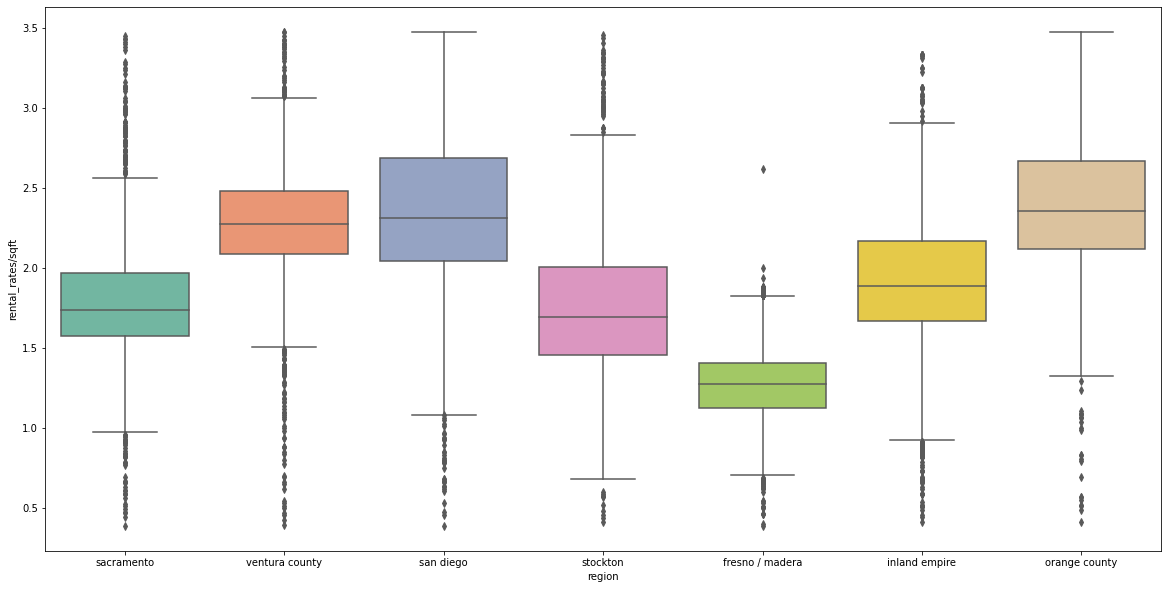

In [28]:
region = df[df.region.isin(lst)]
region.groupby('region').mean()

rcParams['figure.figsize'] = 20,10
sns.boxplot(x ="region", y ="rental_rates/sqft",data=region, palette="Set2")
print(region.groupby('region').mean()['rental_rates_yearly/sqft'])

From the above boxplot, we can see that Orange County has the highest average rental_rates/sqft. San Diego has the similar one which is 28.284272 that is almost as same as Orange County's. And Fresno/Medera has the lowest rental_rates/sqft which is 15.230488.

Then we narrow down and take the consideration of pets_allowed which measures if the house allows pets. 

<AxesSubplot:xlabel='region', ylabel='rental_rates/sqft'>

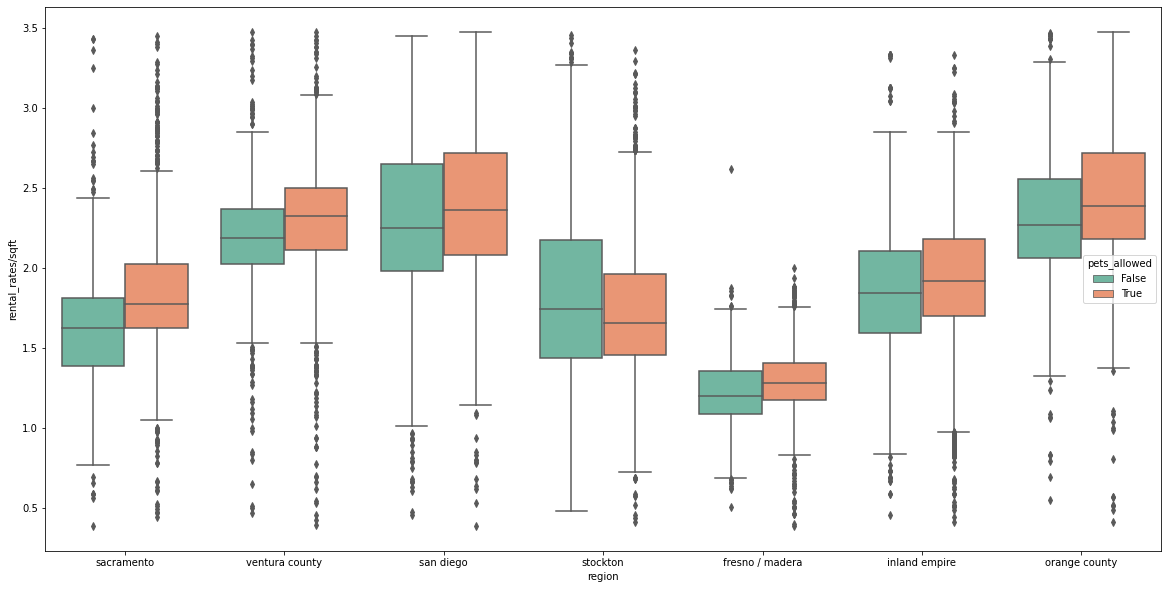

In [29]:
sns.boxplot(x ="region", y ="rental_rates/sqft",hue = 'pets_allowed', data=region, palette="Set2")

From the above box plot, we can see that almost all housing allowed pets have higher average rental_rates/sqft than those does not allow pets. But this situation does not true when it comes to Stockton region. In that region, housing allowed pets has lower average rental_rates/sqft.

Then we keep narowing down. Take a look on how does the average rental_rates/sqft behave in each single parking option.

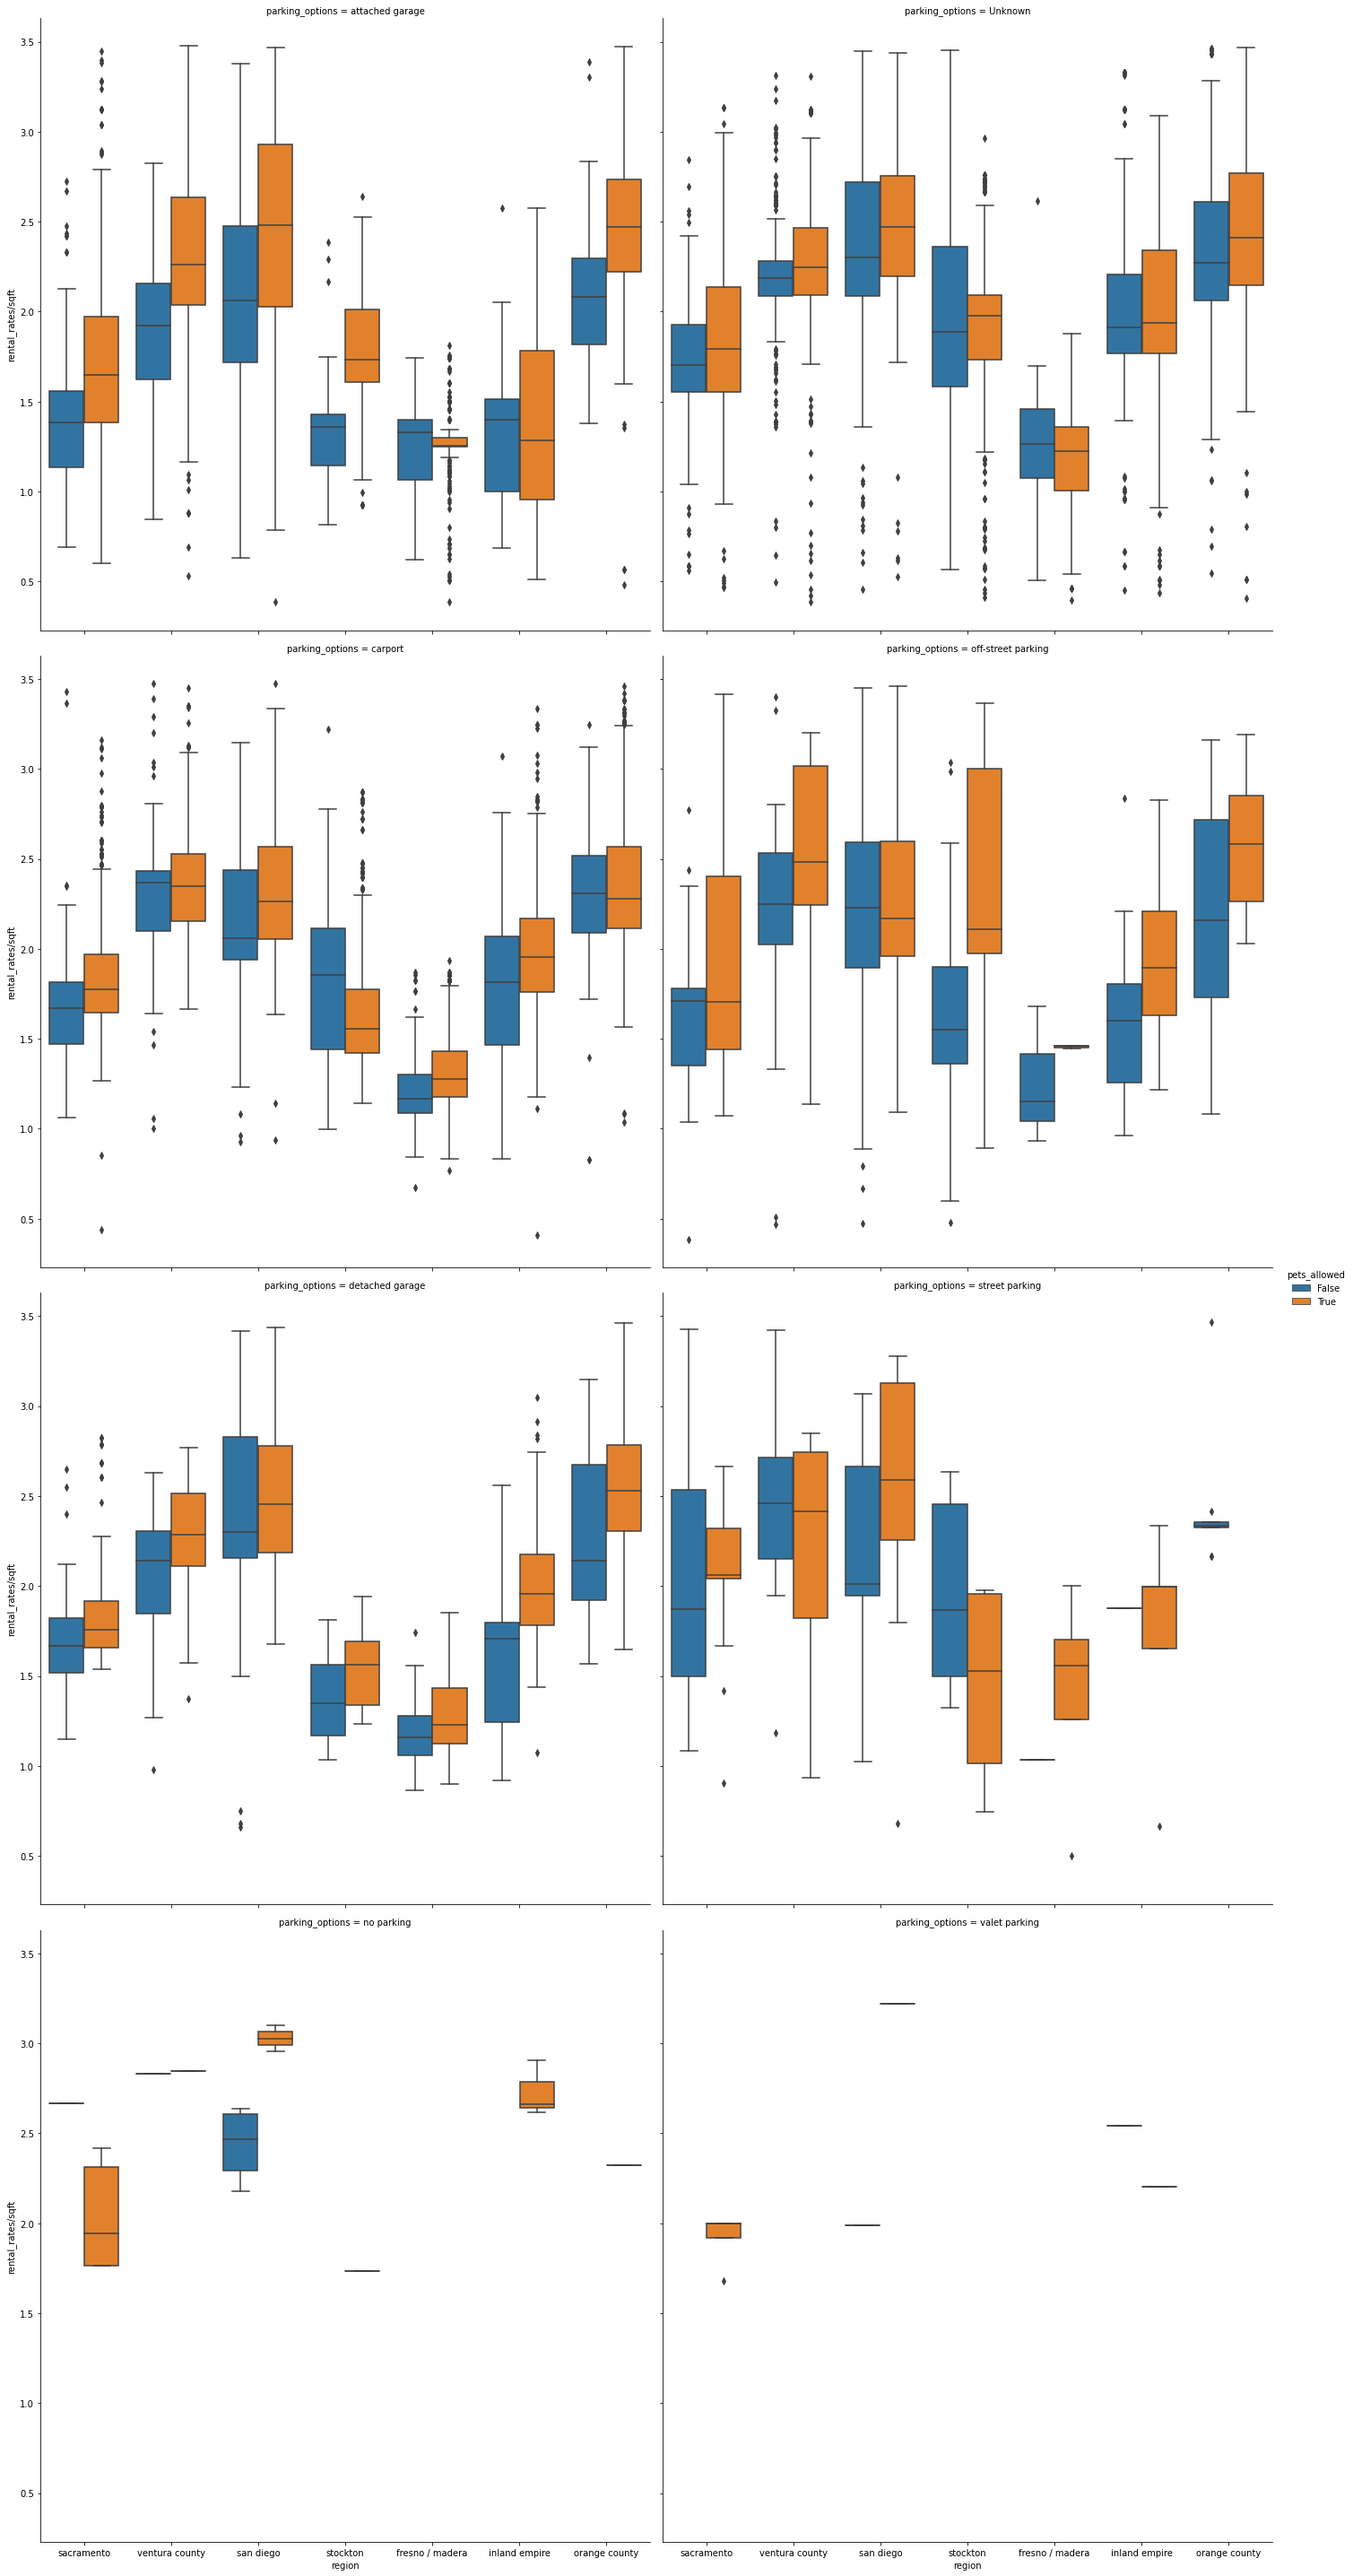

In [30]:
sns.catplot(x ="region", y ="rental_rates/sqft",hue = 'pets_allowed',col="parking_options",col_wrap = 2,data=region,kind="box",height=10)

The general pattern seems keeping the trend that those houses allowed pets have a higher rental_rates/sqft.

<AxesSubplot:xlabel='region', ylabel='rental_rates/sqft'>

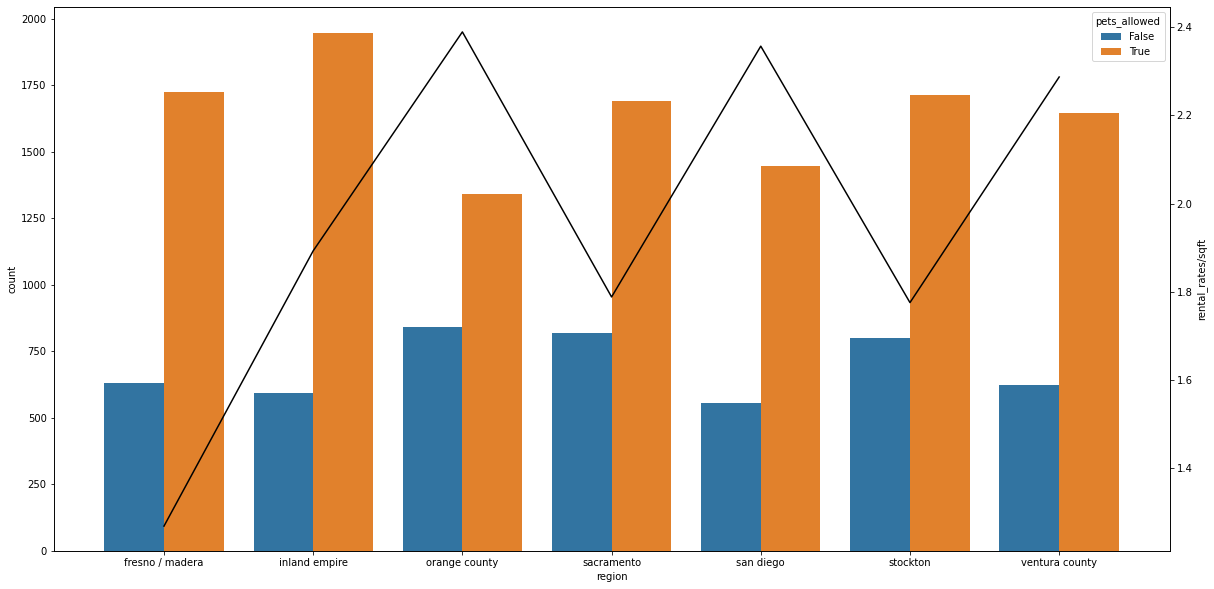

In [31]:
temp1 = region.groupby('region').mean().reset_index()
temp1

ax1 = sns.countplot(x="region",hue = 'pets_allowed',linewidth=5, data=region)
ax2 = ax1.twinx()
sns.lineplot(data = temp1, x="region", y="rental_rates/sqft", color = 'black')

The above graph shows the average rental_rates/sqft(line plot) and the counts of housing in different regions

Now we focus on the relationship between parking and rental_rates/sqft first, along with the path we go above.

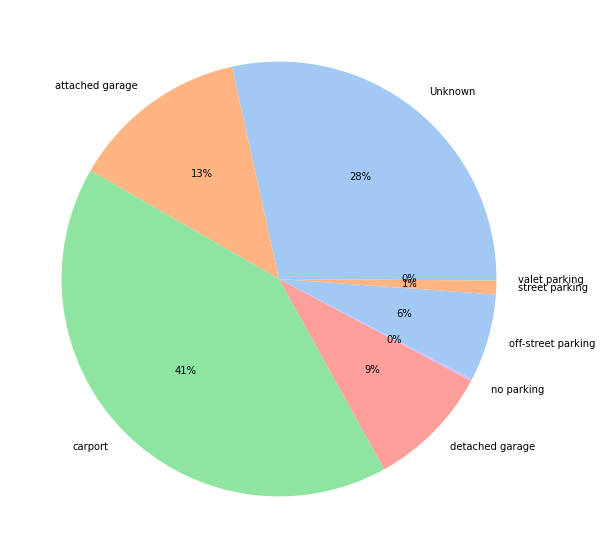

In [32]:
temp = region.groupby('parking_options').count().reset_index()

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(temp['region'], labels = temp['parking_options'], colors = colors, autopct='%.0f%%')
plt.show()

First, we can have a general sense from pie chart above. Carport dominates the parking options. 41% of all parking options is Carport. The second on the unkonwn and then is attached. 

Going along with the pattern above, we focus on the options that have relatively large proportion.

parking_options
Unknown               2.054698
attached garage       1.822373
carport               1.908585
detached garage       2.101478
off-street parking    2.137637
Name: rental_rates/sqft, dtype: float64


<AxesSubplot:xlabel='parking_options', ylabel='rental_rates/sqft'>

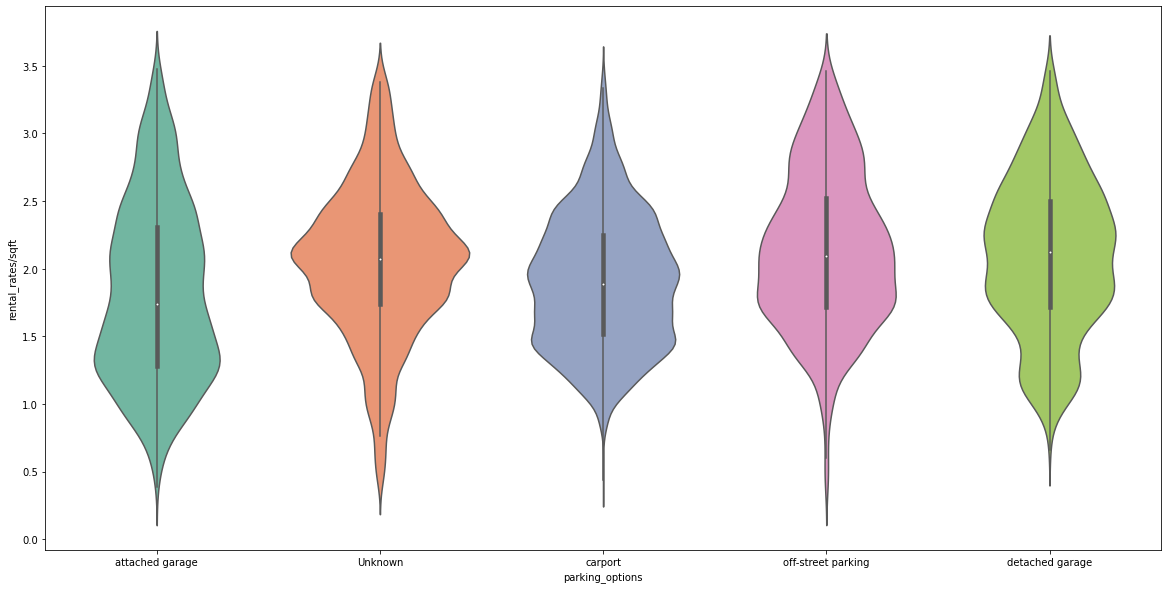

In [33]:
temp2 = df.groupby('parking_options').count().reset_index()
lst2 = temp2[temp2['rental_rates/sqft'] >= 2000]['parking_options'].tolist()

parking = region[region['parking_options'].isin(lst2)]
print(parking.groupby('parking_options').mean()['rental_rates/sqft'])

sns.violinplot(x ="parking_options", y ="rental_rates/sqft", data=parking, palette="Set2")

We can see the distribution among different parking options above. Attached grage has a right tile. And others seem normal distributed. The little black bar in each plot functional as box in the boxplot. And the little white plot is the average rental_rate/sqft. off-street parking has highest value and attached garage has the lowest.

c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Us

<AxesSubplot:xlabel='parking_options', ylabel='rental_rates/sqft'>

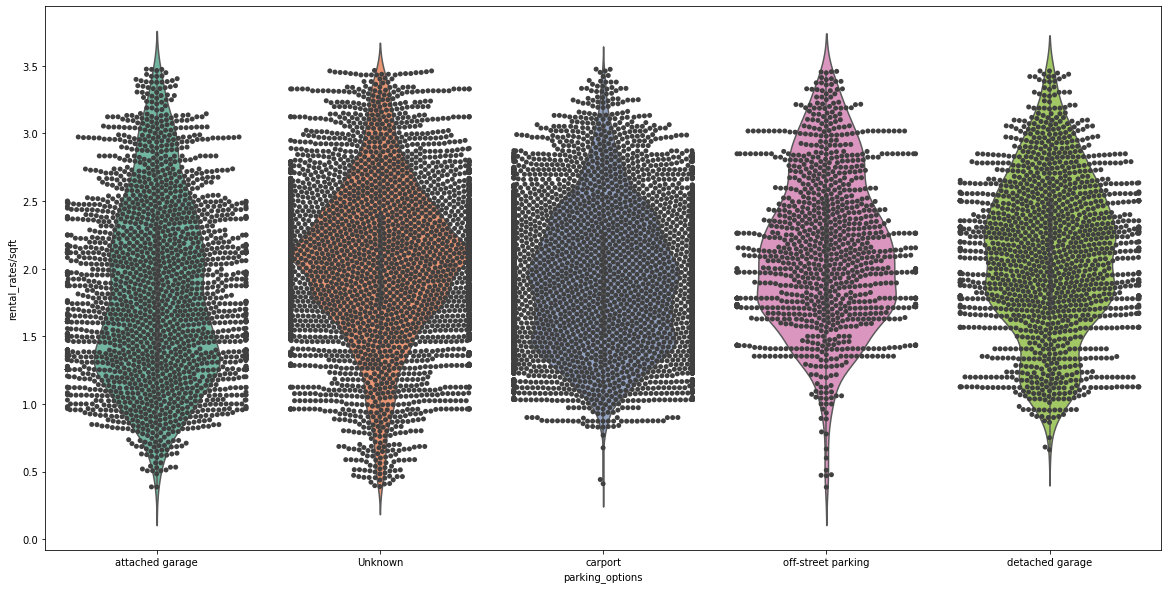

In [34]:
sns.violinplot(x ="parking_options", y ="rental_rates/sqft", data=parking, palette="Set2")
sns.swarmplot(x ="parking_options", y ="rental_rates/sqft", data=parking, color=".25")

This is the graph with detailed distribution information.

<AxesSubplot:xlabel='parking_options', ylabel='rental_rates/sqft'>

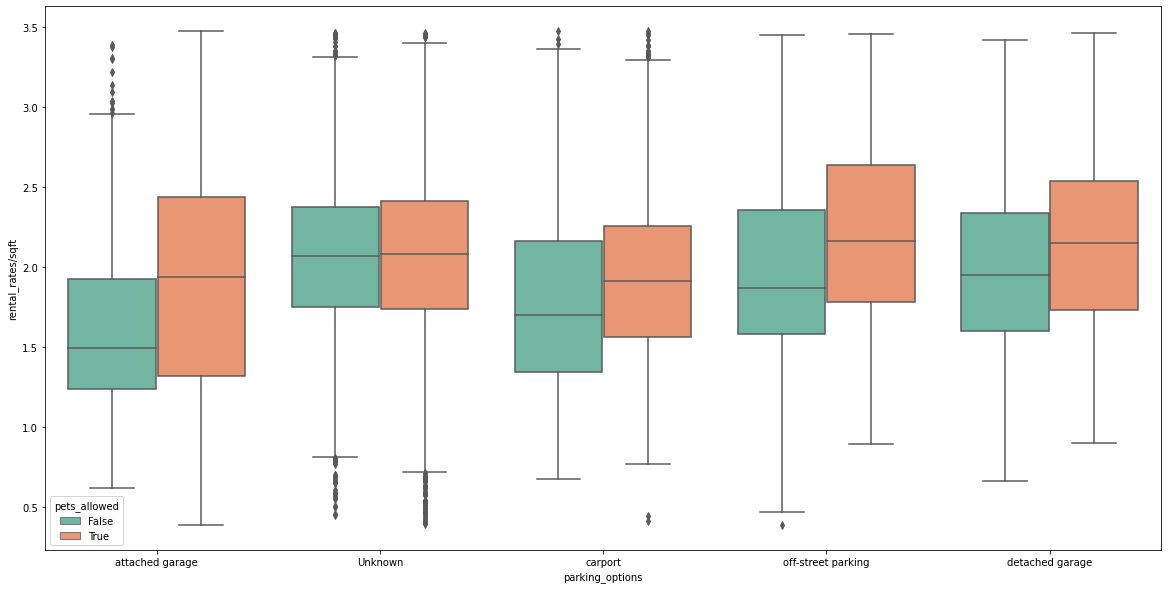

In [35]:
sns.boxplot(x ="parking_options", y ="rental_rates/sqft",hue = 'pets_allowed', data=parking, palette="Set2")

From the above boxplot we can easily find the same trend that housing that is pet allowed has higher rental_rates/sqft among all different types of parking.

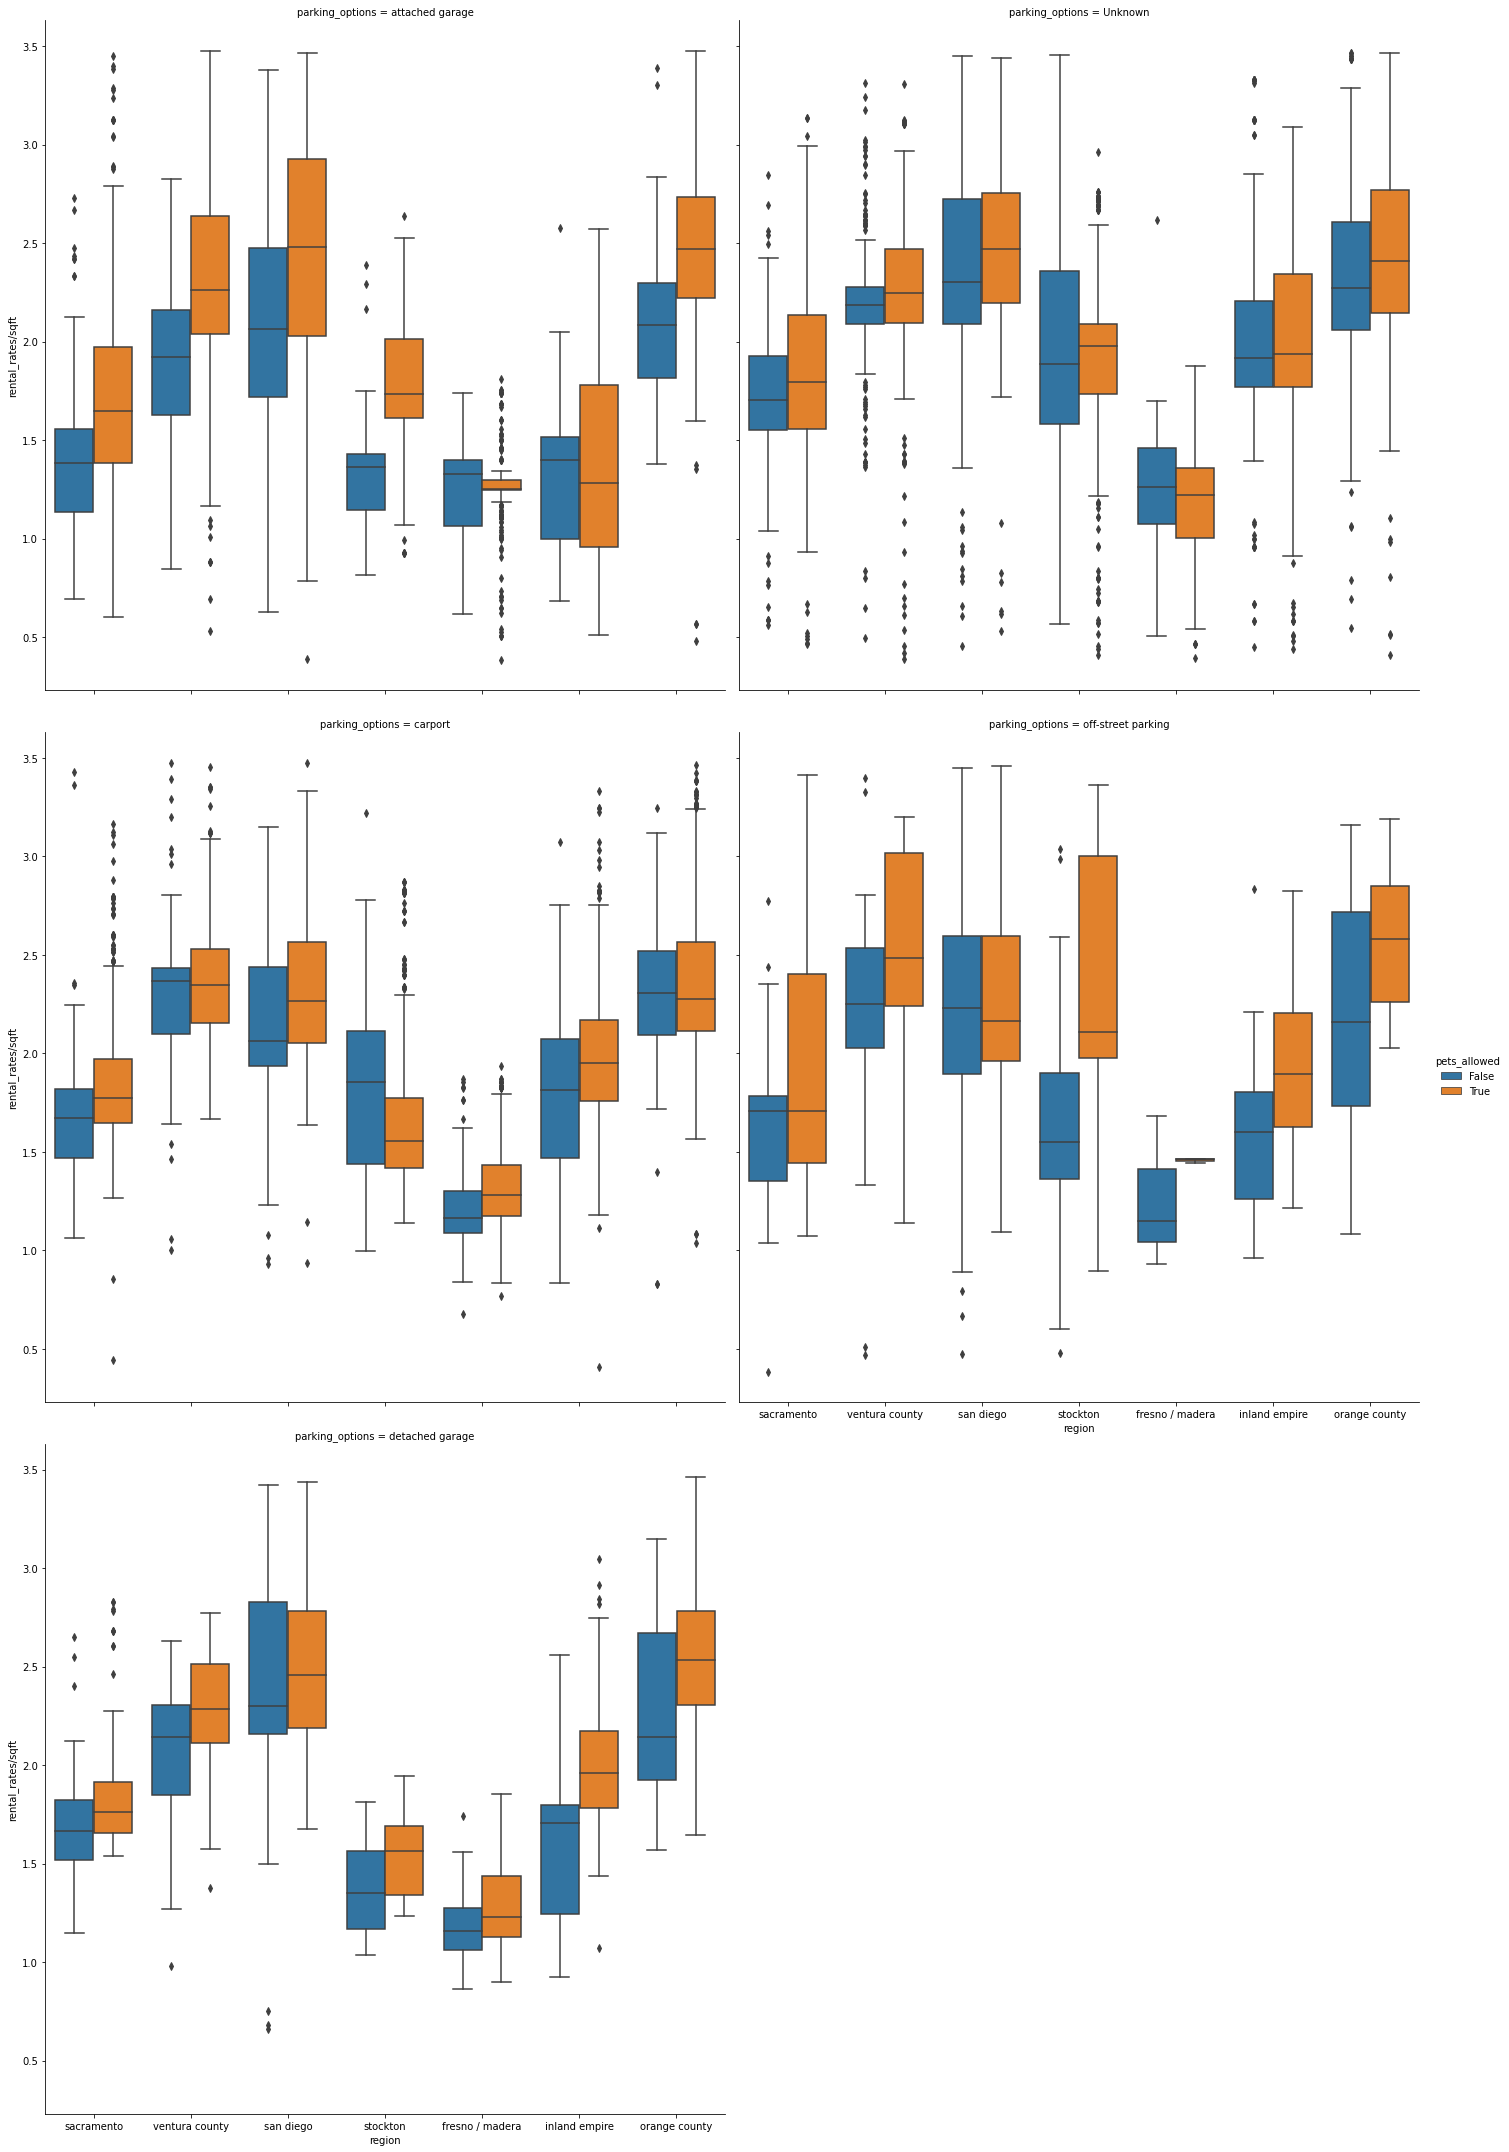

In [36]:
sns.catplot(x ="region", y ="rental_rates/sqft",hue = 'pets_allowed',col="parking_options",col_wrap = 2,data=parking,kind="box",height=10)

And this pattern or trend still hold when we dig into every regions.

## Analysis

<AxesSubplot:xlabel='parking_options', ylabel='rental_rates/sqft'>

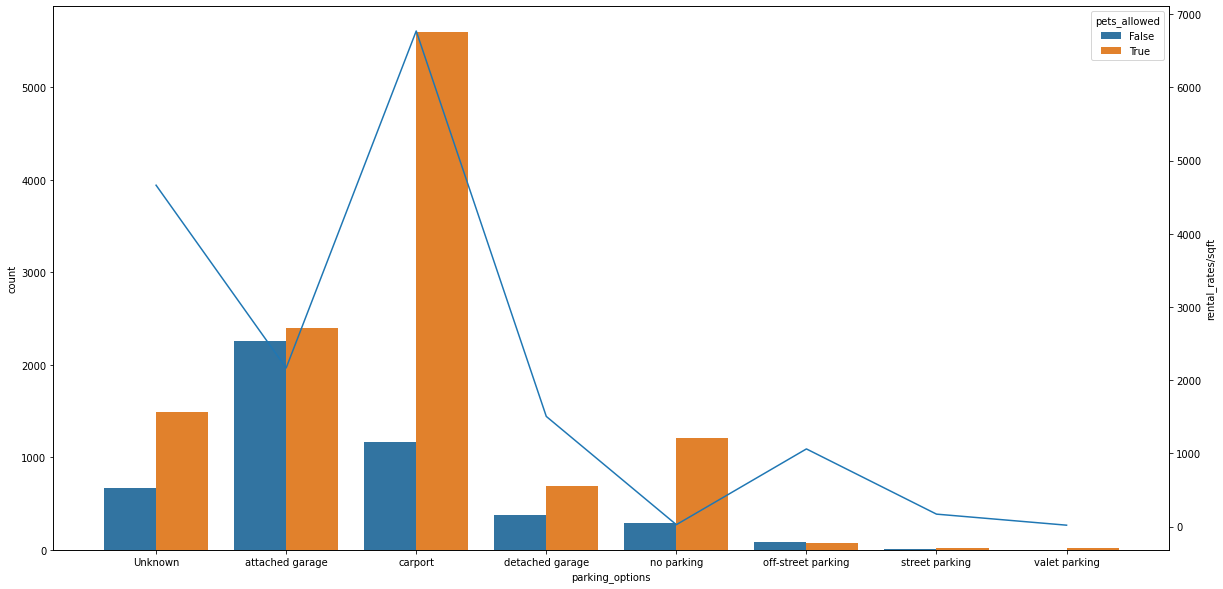

In [37]:
ax1 = sns.countplot(x="parking_options",hue = 'pets_allowed',linewidth=5, data=region)
ax2 = ax1.twinx()
sns.lineplot(data = temp, x="parking_options", y="rental_rates/sqft")

The above graph shows the average rental_rates/sqft(line plot) and the counts of different types of parking option.

First we try to figure out the relationship between laundry option and yearly rental rates per squarefeet.

In [38]:
df.head()

region  laundry_options  parking_options  pets_allowed  \
0  reno / tahoe      w/d in unit          carport          True   
1  reno / tahoe      w/d hookups          carport         False   
2  reno / tahoe      w/d in unit  attached garage          True   
3  reno / tahoe      w/d in unit          carport          True   
4  reno / tahoe  laundry on site          Unknown          True   

   rental_rates/sqft  rental_rates_yearly/sqft  
0           1.064935                 12.779221  
1           1.198801                 14.385614  
2           1.077243                 12.926916  
3           1.546610                 18.559322  
4           1.156000                 13.872000

In [39]:
temp = df.groupby('region').count().reset_index()
lst = temp[temp['rental_rates/sqft'] >= 2000]['region'].tolist()

In [40]:
lst

['fresno / madera',
 'inland empire',
 'orange county',
 'sacramento',
 'san diego',
 'stockton',
 'ventura county']

In [41]:
df1 = df[df["region"].isin(lst)]
df1 = df1.reset_index()
df1.head()

grouped = df1.groupby(["region","laundry_options"]).mean()
grouped = grouped.reset_index()
grouped

region     laundry_options          index  pets_allowed  \
0   fresno / madera             Unknown  369810.960227      0.534091   
1   fresno / madera     laundry in bldg  370169.406780      0.898305   
2   fresno / madera     laundry on site  370132.228814      0.527542   
3   fresno / madera  no laundry on site  370220.000000      0.000000   
4   fresno / madera         w/d hookups  370072.435096      0.838942   
5   fresno / madera         w/d in unit  370169.281642      0.801596   
6     inland empire             Unknown  373769.549512      0.205021   
7     inland empire     laundry in bldg  374020.723404      0.723404   
8     inland empire     laundry on site  373854.363636      0.835095   
9     inland empire  no laundry on site  373572.833333      0.333333   
10    inland empire         w/d hookups  373840.692042      0.712803   
11    inland empire         w/d in unit  373464.795524      0.947101   
12    orange county             Unknown  381387.180220      0.296703   
13    orange county     laundry in bldg  381400.463636      0.754545   
14    orange county     laundry on site  381384.043042      0.724534   
15    orange county  no laundry on site  381768.666667      0.000000   
16    orange county         w/d hookups  381532.609929      0.801418   
17    orange county         w/d in unit  381355.568445      0.937355   
18       sacramento             Unknown    5443.497992      0.317269   
19       sacramento     laundry in bldg   10709.739130      0.521739   
20       sacramento     laundry on site    9068.258915      0.741085   
21       sacramento  no laundry on site    2052.400000      0.300000   
22       sacramento         w/d hookups    8221.666667      0.530303   
23       sacramento         w/d in unit    6763.276261      0.856907   
24        san diego             Unknown   11873.561170      0.178191   
25        san diego     laundry in bldg   24823.803030      0.439394   
26        san diego     laundry on site    9152.777778      0.622605   
27        san diego  no laundry on site    4994.300000      0.250000   
28        san diego         w/d hookups   25775.202247      0.516854   
29        san diego         w/d in unit    8650.724665      0.804971   
30         stockton             Unknown   13392.706030      0.150754   
31         stockton     laundry in bldg   10812.841121      0.915888   
32         stockton     laundry on site   11440.132836      0.888060   
33         stockton  no laundry on site   11026.500000      0.428571   
34         stockton         w/d hookups   10846.796694      0.714050   
35         stockton         w/d in unit   10782.937063      0.699301   
36   ventura county             Unknown   13249.142114      0.436742   
37   ventura county     laundry in bldg   13326.302326      0.348837   
38   ventura county     laundry on site   13456.177874      0.874187   
39   ventura county  no laundry on site   13409.727273      0.090909   
40   ventura county         w/d hookups   13147.606838      0.393162   
41   ventura county         w/d in unit   13937.879699      0.924060   

    rental_rates/sqft  rental_rates_yearly/sqft  
0            1.110042                 13.320505  
1            1.345980                 16.151755  
2            1.205195                 14.462344  
3            1.101225                 13.214706  
4            1.219064                 14.628773  
5            1.354604                 16.255245  
6            1.969244                 23.630930  
7            2.125464                 25.505564  
8            1.907670                 22.892042  
9            1.563852                 18.766225  
10           1.305893                 15.670716  
11           1.994042                 23.928508  
12           2.300191                 27.602292  
13           2.394023                 28.728271  
14           2.342981                 28.115767  
15           2.125534                 25.506410  
16           2.055216                 24.662593  
17           2.5

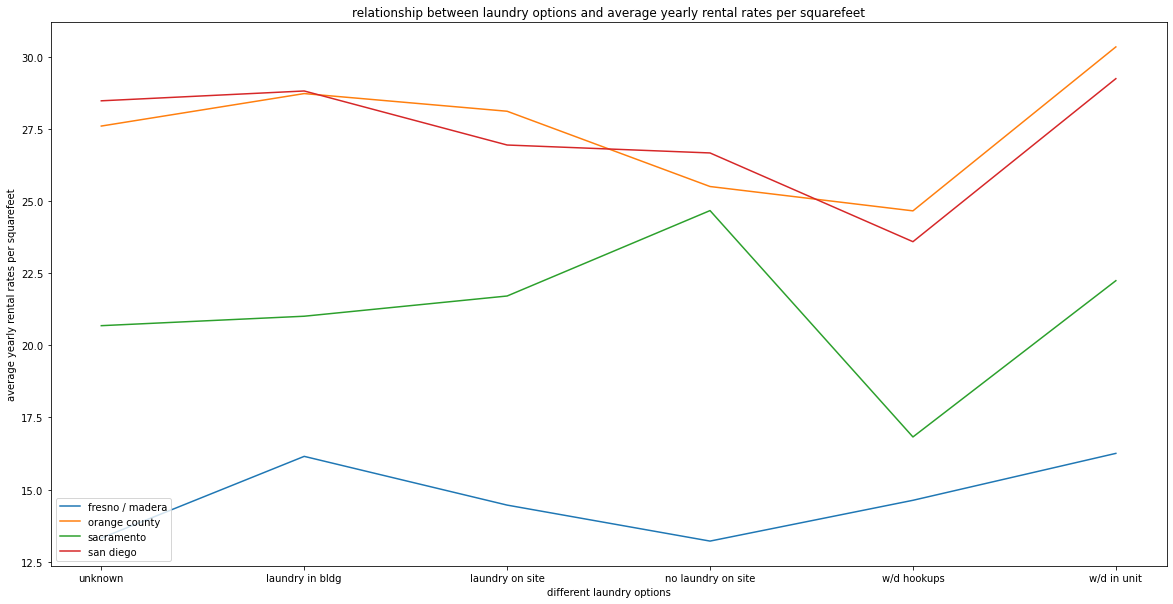

In [42]:
import matplotlib.pyplot as plt
  
# create data
x_1 = ["unknown","laundry in bldg", "laundry on site", "no laundry on site", "w/d hookups","w/d in unit"]
y_1 = grouped[grouped["region"] == "fresno / madera"]["rental_rates_yearly/sqft"]
y_2 = grouped[grouped["region"] == "orange county"]["rental_rates_yearly/sqft"]
y_3 = grouped[grouped["region"] == "sacramento"]["rental_rates_yearly/sqft"]
y_4 = grouped[grouped["region"] == "san diego"]["rental_rates_yearly/sqft"]



  
# plot lines
plt.plot(x_1, y_1, label = "fresno / madera")
plt.plot(x_1, y_2, label = "orange county")
plt.plot(x_1, y_3, label = "sacramento")
plt.plot(x_1, y_4, label = "san diego")

plt.xlabel("different laundry options")
plt.ylabel("average yearly rental rates per squarefeet")
plt.title("relationship between laundry options and average yearly rental rates per squarefeet")


plt.legend(loc='lower left')
plt.show()

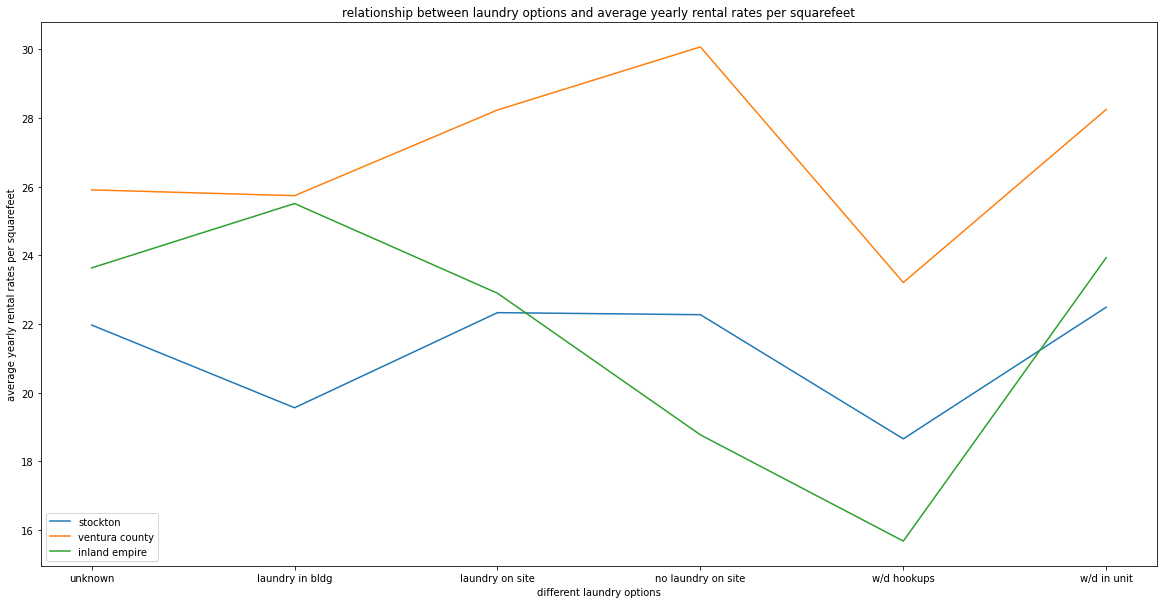

In [43]:
y_5 = grouped[grouped["region"] == "stockton"]["rental_rates_yearly/sqft"]
y_6 = grouped[grouped["region"] == "ventura county"]["rental_rates_yearly/sqft"]
y_7 = grouped[grouped["region"] == "inland empire"]["rental_rates_yearly/sqft"]

plt.plot(x_1, y_5, label = "stockton")
plt.plot(x_1, y_6, label = "ventura county")
plt.plot(x_1, y_7, label = "inland empire")
plt.xlabel("different laundry options")
plt.ylabel("average yearly rental rates per squarefeet")
plt.title("relationship between laundry options and average yearly rental rates per squarefeet")


plt.legend(loc='lower left')
plt.show()



#### Let's look at the parking_options pattern in relation with the rental_rates_yearly/sqft in different regions. However, before generating the plot, let's get rid of the "Unknown" type of parking from the dataset since we don't really care about how "Unknown" type affect the rental_rates_yearly/sqft in different regions.

In [44]:
region2 = region[region["parking_options"] != "Unknown"]
region2

region  laundry_options  parking_options  pets_allowed  \
50      sacramento      w/d in unit  attached garage          True   
77      sacramento      w/d in unit  attached garage          True   
155     sacramento      w/d hookups  attached garage         False   
207     sacramento  laundry on site          carport          True   
303     sacramento      w/d hookups  attached garage         False   
...            ...              ...              ...           ...   
384926  sacramento  laundry on site          carport          True   
384938  sacramento      w/d in unit   street parking         False   
384945  sacramento  laundry on site          carport          True   
384958  sacramento      w/d in unit          carport          True   
384970  sacramento      w/d in unit          carport          True   

        rental_rates/sqft  rental_rates_yearly/sqft  
50               1.386139                 16.633663  
77               1.970387                 23.644647  
155              1.540909                 18.490909  
207              1.975581                 23.706977  
303              1.540909                 18.490909  
...                   ...                       ...  
384926           0.854037                 10.248447  
384938           1.083333                 13.000000  
384945           1.881271                 22.575251  
384958           1.671875                 20.062500  
384970           1.636060                 19.632721  

[11712 rows x 6 columns]

<AxesSubplot:xlabel='parking_options', ylabel='rental_rates_yearly/sqft'>

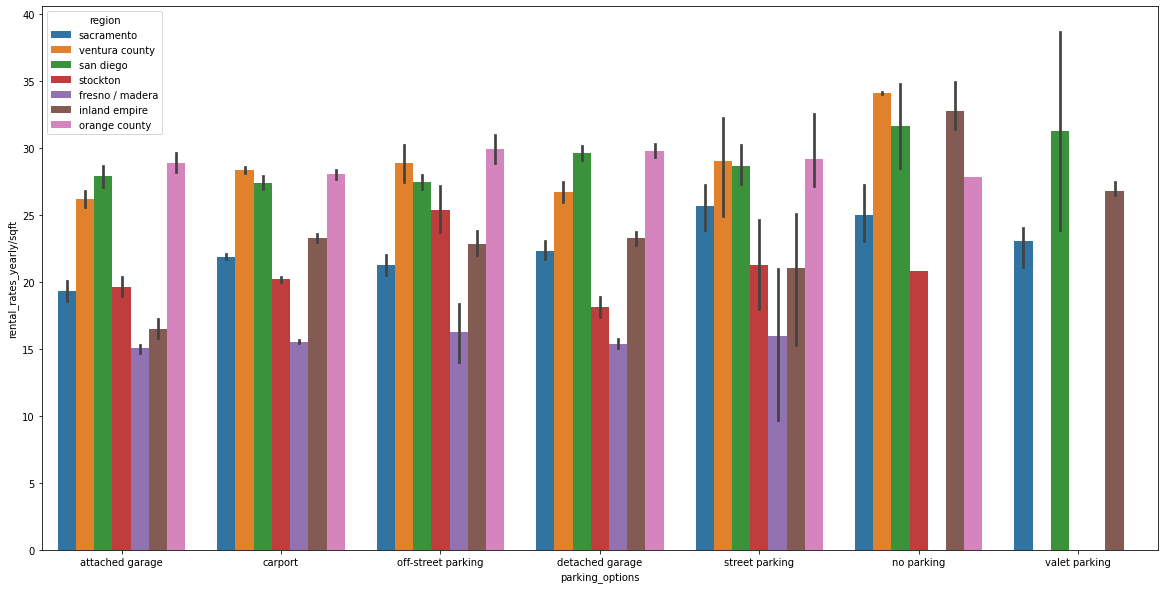

In [45]:
sns.barplot(x = "parking_options", y = "rental_rates_yearly/sqft", hue = "region", data = region2)

As the plot shown above, first of all, in fresno/madera, there seems to be no clear differences in average rental rates between different types of parking options. In sacramento, houses with street parkings have higher average rental rates. In inland empire, ventura county and san diego, houses with no parking have the highest average rental rates. In stockton, houses with off-street parking have the highest average rental rates. In orange county, houses with off-street parking have the highest average rental rates. To make sure we have a reliable result, we will conduct a chi-squared test to see if the highest average rental rates are really valid.

In [46]:
region2["parking_options"].value_counts()

carport               6770
attached garage       2166
detached garage       1504
off-street parking    1060
street parking         169
no parking              25
valet parking           18
Name: parking_options, dtype: int64

In [47]:
sacra_attached = np.mean(region2[(region2["region"] == "sacramento") & (region2["parking_options"] == "attached garage")]["rental_rates_yearly/sqft"])
sacra_carport = np.mean(region2[(region2["region"] == "sacramento") & (region2["parking_options"] == "carport")]["rental_rates_yearly/sqft"])
sacra_off_street = np.mean(region2[(region2["region"] == "sacramento") & (region2["parking_options"] == "off-street parking")]["rental_rates_yearly/sqft"])
sacra_detached = np.mean(region2[(region2["region"] == "sacramento") & (region2["parking_options"] == "detached garage")]["rental_rates_yearly/sqft"])
sacra_street = np.mean(region2[(region2["region"] == "sacramento") & (region2["parking_options"] == "street parking")]["rental_rates_yearly/sqft"])
sacra_no_parking = np.mean(region2[(region2["region"] == "sacramento") & (region2["parking_options"] == "no parking")]["rental_rates_yearly/sqft"])
sacra_valet = np.mean(region2[(region2["region"] == "sacramento") & (region2["parking_options"] == "valet parking")]["rental_rates_yearly/sqft"])
sacramento_average = [sacra_attached, sacra_carport, sacra_off_street, sacra_detached, sacra_street, sacra_no_parking, sacra_valet]
sacramento_average

[19.29890887373334,
 21.865233843894426,
 21.233528689594692,
 22.329455624701804,
 25.63275581434103,
 24.99321071977234,
 23.04310344827586]

#### Let's generate the expected values of rental rates on different types of parking options.

In [48]:
sacra_expected = np.mean(sacramento_average)
sacra_expected_list = [sacra_expected, sacra_expected, sacra_expected, sacra_expected, sacra_expected, sacra_expected, sacra_expected]

#### Now we have our expected values and observed values, let's do the chi-squared test to test if the observed parking option with highest average rental rates is valid.

In [49]:
sp.stats.chisquare(sacramento_average, sacra_expected_list)

Power_divergenceResult(statistic=1.2592095454786902, pvalue=0.9738592332924682)

### Since the p-value is so large (greater than 0.05), there is no significant differences between rental rates of each parking options. Thus, we can say that in Sacramento, the parking options does not have any relationships with the rental rates.

#### Let's do the same process for the rest of the areas.

In [50]:
ventura_county_attached = np.mean(region2[(region2["region"] == "ventura county") & (region2["parking_options"] == "attached garage")]["rental_rates_yearly/sqft"])
ventura_county_carport = np.mean(region2[(region2["region"] == "ventura county") & (region2["parking_options"] == "carport")]["rental_rates_yearly/sqft"])
ventura_county_off_street = np.mean(region2[(region2["region"] == "ventura county") & (region2["parking_options"] == "off-street parking")]["rental_rates_yearly/sqft"])
ventura_county_detached = np.mean(region2[(region2["region"] == "ventura county") & (region2["parking_options"] == "detached garage")]["rental_rates_yearly/sqft"])
ventura_county_street = np.mean(region2[(region2["region"] == "ventura county") & (region2["parking_options"] == "street parking")]["rental_rates_yearly/sqft"])
ventura_county_no_parking = np.mean(region2[(region2["region"] == "ventura county") & (region2["parking_options"] == "no parking")]["rental_rates_yearly/sqft"])

ventura_county_average = [ventura_county_attached, ventura_county_carport, ventura_county_off_street, ventura_county_detached, ventura_county_street, ventura_county_no_parking]

ventura_county_expected = np.mean(ventura_county_average)
ventura_county_expected_list = [ventura_county_expected, ventura_county_expected, ventura_county_expected, ventura_county_expected, ventura_county_expected, ventura_county_expected]

sp.stats.chisquare(ventura_county_average, ventura_county_expected_list)

Power_divergenceResult(statistic=1.363728001196179, pvalue=0.9282395391596028)

### Unfortunately, the p value is greater than our threshold 0.05, so there is no significant difference between rental rates of each parking options. Thus, we can say that in Ventura County, the parking options does not have any relationships with the rental rates.

In [51]:
san_diego_attached = np.mean(region2[(region2["region"] == "san diego") & (region2["parking_options"] == "attached garage")]["rental_rates_yearly/sqft"])
san_diego_carport = np.mean(region2[(region2["region"] == "san diego") & (region2["parking_options"] == "carport")]["rental_rates_yearly/sqft"])
san_diego_off_street = np.mean(region2[(region2["region"] == "san diego") & (region2["parking_options"] == "off-street parking")]["rental_rates_yearly/sqft"])
san_diego_detached = np.mean(region2[(region2["region"] == "san diego") & (region2["parking_options"] == "detached garage")]["rental_rates_yearly/sqft"])
san_diego_street = np.mean(region2[(region2["region"] == "san diego") & (region2["parking_options"] == "street parking")]["rental_rates_yearly/sqft"])
san_diego_no_parking = np.mean(region2[(region2["region"] == "san diego") & (region2["parking_options"] == "no parking")]["rental_rates_yearly/sqft"])
san_diego_valet = np.mean(region2[(region2["region"] == "san diego") & (region2["parking_options"] == "valet parking")]["rental_rates_yearly/sqft"])

san_diego_average = [san_diego_attached, san_diego_carport, san_diego_off_street, san_diego_detached, san_diego_street, san_diego_no_parking, san_diego_valet]

san_diego_expected = np.mean(san_diego_average)
san_diego_expected_list = [san_diego_expected, san_diego_expected, san_diego_expected, san_diego_expected, san_diego_expected, san_diego_expected, san_diego_expected]

sp.stats.chisquare(san_diego_average, san_diego_expected_list)

Power_divergenceResult(statistic=0.6388030301644008, pvalue=0.9957177756587727)

### Unfortunately, the p value is greater than our threshold 0.05, so there is no significant difference between rental rates of each parking options. Thus, we can say that in San Diego, the parking options does not have any relationships with the rental rates.

In [52]:
stockton_attached = np.mean(region2[(region2["region"] == "stockton") & (region2["parking_options"] == "attached garage")]["rental_rates_yearly/sqft"])
stockton_carport = np.mean(region2[(region2["region"] == "stockton") & (region2["parking_options"] == "carport")]["rental_rates_yearly/sqft"])
stockton_off_street = np.mean(region2[(region2["region"] == "stockton") & (region2["parking_options"] == "off-street parking")]["rental_rates_yearly/sqft"])
stockton_detached = np.mean(region2[(region2["region"] == "stockton") & (region2["parking_options"] == "detached garage")]["rental_rates_yearly/sqft"])
stockton_street = np.mean(region2[(region2["region"] == "stockton") & (region2["parking_options"] == "street parking")]["rental_rates_yearly/sqft"])
stockton_no_parking = np.mean(region2[(region2["region"] == "stockton") & (region2["parking_options"] == "no parking")]["rental_rates_yearly/sqft"])

stockton_average = [stockton_attached, stockton_carport, stockton_off_street, stockton_detached, stockton_street, stockton_no_parking]

stockton_expected = np.mean(stockton_average)
stockton_expected_list = [stockton_expected, stockton_expected, stockton_expected, stockton_expected, stockton_expected, stockton_expected]

sp.stats.chisquare(stockton_average, stockton_expected_list)

Power_divergenceResult(statistic=1.4251723430226146, pvalue=0.921540012156204)

### Unfortunately, the p value is greater than our threshold 0.05, so there is no significant difference between rental rates of each parking options. Thus, we can say that in Stockton, the parking options does not have any relationships with the rental rates.

In [53]:
fresno_madera_attached = np.mean(region2[(region2["region"] == "fresno / madera") & (region2["parking_options"] == "attached garage")]["rental_rates_yearly/sqft"])
fresno_madera_carport = np.mean(region2[(region2["region"] == "fresno / madera") & (region2["parking_options"] == "carport")]["rental_rates_yearly/sqft"])
fresno_madera_off_street = np.mean(region2[(region2["region"] == "fresno / madera") & (region2["parking_options"] == "off-street parking")]["rental_rates_yearly/sqft"])
fresno_madera_detached = np.mean(region2[(region2["region"] == "fresno / madera") & (region2["parking_options"] == "detached garage")]["rental_rates_yearly/sqft"])
fresno_madera_street = np.mean(region2[(region2["region"] == "fresno / madera") & (region2["parking_options"] == "street parking")]["rental_rates_yearly/sqft"])

fresno_madera_average = [fresno_madera_attached, fresno_madera_carport, fresno_madera_off_street, fresno_madera_detached, fresno_madera_street]

fresno_madera_expected = np.mean(fresno_madera_average)
fresno_madera_expected_list = [fresno_madera_expected, fresno_madera_expected, fresno_madera_expected, fresno_madera_expected, fresno_madera_expected]

sp.stats.chisquare(fresno_madera_average, fresno_madera_expected_list)

Power_divergenceResult(statistic=0.060331289939045255, pvalue=0.9995540641595302)

### Unfortunately, the p value is greater than our threshold 0.05, so there is no significant difference between rental rates of each parking options. Thus, we can say that in Fresno / Madera, the parking options does not have any relationships with the rental rates.

In [54]:
inland_empire_attached = np.mean(region2[(region2["region"] == "inland empire") & (region2["parking_options"] == "attached garage")]["rental_rates_yearly/sqft"])
inland_empire_carport = np.mean(region2[(region2["region"] == "inland empire") & (region2["parking_options"] == "carport")]["rental_rates_yearly/sqft"])
inland_empire_off_street = np.mean(region2[(region2["region"] == "inland empire") & (region2["parking_options"] == "off-street parking")]["rental_rates_yearly/sqft"])
inland_empire_detached = np.mean(region2[(region2["region"] == "inland empire") & (region2["parking_options"] == "detached garage")]["rental_rates_yearly/sqft"])
inland_empire_street = np.mean(region2[(region2["region"] == "inland empire") & (region2["parking_options"] == "street parking")]["rental_rates_yearly/sqft"])
inland_empire_no_parking = np.mean(region2[(region2["region"] == "inland empire") & (region2["parking_options"] == "no parking")]["rental_rates_yearly/sqft"])
inland_empire_valet = np.mean(region2[(region2["region"] == "inland empire") & (region2["parking_options"] == "valet parking")]["rental_rates_yearly/sqft"])

inland_empire_average = [inland_empire_attached, inland_empire_carport, inland_empire_off_street, inland_empire_detached, inland_empire_street, inland_empire_no_parking, inland_empire_valet]

inland_empire_expected = np.mean(inland_empire_average)
inland_empire_expected_list = [inland_empire_expected, inland_empire_expected, inland_empire_expected, inland_empire_expected, inland_empire_expected, inland_empire_expected, inland_empire_expected]

sp.stats.chisquare(inland_empire_average, inland_empire_expected_list)

Power_divergenceResult(statistic=6.36272529298945, pvalue=0.3838069828764105)

### Unfortunately, although the p value is the lowest compare to those of the other areas, it is still greater than our threshold 0.05, so there is no significant difference between rental rates of each parking options. Thus, we can say that in Inland Empire, the parking options does not have any relationships with the rental rates.

In [55]:
orange_county_attached = np.mean(region2[(region2["region"] == "orange county") & (region2["parking_options"] == "attached garage")]["rental_rates_yearly/sqft"])
orange_county_carport = np.mean(region2[(region2["region"] == "orange county") & (region2["parking_options"] == "carport")]["rental_rates_yearly/sqft"])
orange_county_off_street = np.mean(region2[(region2["region"] == "orange county") & (region2["parking_options"] == "off-street parking")]["rental_rates_yearly/sqft"])
orange_county_detached = np.mean(region2[(region2["region"] == "orange county") & (region2["parking_options"] == "detached garage")]["rental_rates_yearly/sqft"])
orange_county_street = np.mean(region2[(region2["region"] == "orange county") & (region2["parking_options"] == "street parking")]["rental_rates_yearly/sqft"])
orange_county_no_parking = np.mean(region2[(region2["region"] == "orange county") & (region2["parking_options"] == "no parking")]["rental_rates_yearly/sqft"])

orange_county_average = [orange_county_attached, orange_county_carport, orange_county_off_street, orange_county_detached, orange_county_street, orange_county_no_parking]

orange_county_expected = np.mean(orange_county_average)
orange_county_expected_list = [orange_county_expected, orange_county_expected, orange_county_expected, orange_county_expected, orange_county_expected, orange_county_expected]

sp.stats.chisquare(orange_county_average, orange_county_expected_list)

Power_divergenceResult(statistic=0.1308208188265525, pvalue=0.9996857377234488)

### Unfortunately, the p value is greater than our threshold 0.05, so there is no significant difference between rental rates of each parking options. Thus, we can say that in Orange County, the parking options does not have any relationships with the rental rates.

## In conclusion, there is no clear relationships between the parking options and the average rental rates per year for all areas (Sacramento, Orange County, San Diego, Inland Empire, Fresno/Madera, Stockton, and Ventura County).

## hyphothesis test

In [56]:
temp = df.groupby('region').count().reset_index()
lst_region = temp[temp['rental_rates/sqft'] >= 2000]['region'].tolist()
lst_region

['fresno / madera',
 'inland empire',
 'orange county',
 'sacramento',
 'san diego',
 'stockton',
 'ventura county']

In [57]:
region = df[df.region.isin(lst)]
new = region[['region','rental_rates/sqft']].reset_index().drop('index',axis = 1)
new

region  rental_rates/sqft
0      sacramento           1.386139
1      sacramento           2.065593
2      sacramento           1.970387
3      sacramento           1.540909
4      sacramento           1.975581
...           ...                ...
16370  sacramento           0.854037
16371  sacramento           1.083333
16372  sacramento           1.881271
16373  sacramento           1.671875
16374  sacramento           1.636060

[16375 rows x 2 columns]

In [58]:
new_fresno = new[new['region'] == 'fresno / madera'].reset_index().drop('index',axis = 1)['rental_rates/sqft']
new_inland = new[new['region'] == 'inland empire'].reset_index().drop('index',axis = 1)['rental_rates/sqft']
new_orange = new[new['region'] == 'orange county'].reset_index().drop('index',axis = 1)['rental_rates/sqft']
new_sacramento = new[new['region'] == 'sacramento'].reset_index().drop('index',axis = 1)['rental_rates/sqft']
new_san = new[new['region'] == 'san diego'].reset_index().drop('index',axis = 1)['rental_rates/sqft']
new_stockton = new[new['region'] == 'stockton'].reset_index().drop('index',axis = 1)['rental_rates/sqft']
new_ventura = new[new['region'] == 'ventura county'].reset_index().drop('index',axis = 1)['rental_rates/sqft']


In [59]:
print(len(new_fresno),len(new_inland),len(new_orange),len(new_sacramento),len(new_san),len(new_stockton),len(new_ventura))

2002 2515 2268 2357 2185 2509 2539


In [60]:
dic = {'fresno / madera':new_fresno,
 'inland empire':new_inland,
 'orange county':new_orange,
 'sacramento':new_sacramento,
 'san diego':new_san,
 'stockton':new_stockton,
 'ventura county':new_ventura}

In [61]:
df_region = pd.DataFrame(data = dic)
df_region

fresno / madera  inland empire  orange county  sacramento  san diego  \
0            1.460957       1.782908       2.298507    1.386139   2.071429   
1            1.307956       2.033582       2.341920    2.065593   2.428571   
2            0.954545       1.958857       2.517434    1.970387   2.382431   
3            0.942105       1.697942       2.135093    1.540909   3.052550   
4            0.505817       2.236599       3.228571    1.975581   2.562408   
...               ...            ...            ...         ...        ...   
2534              NaN            NaN            NaN         NaN        NaN   
2535              NaN            NaN            NaN         NaN        NaN   
2536              NaN            NaN            NaN         NaN        NaN   
2537              NaN            NaN            NaN         NaN        NaN   
2538              NaN            NaN            NaN         NaN        NaN   

      stockton  ventura county  
0     1.175882        2.352941  
1     1.357143        2.348066  
2     1.361702        2.459016  
3     1.361702        2.057444  
4     1.845026        2.080766  
...        ...             ...  
2534       NaN        2.528179  
2535       NaN        2.135714  
2536       NaN        1.879927  
2537       NaN        2.043215  
2538       NaN        2.239733  

[2539 rows x 7 columns]

In [62]:
df_melt = pd.melt(df_region.reset_index(), id_vars=['index'], value_vars=['fresno / madera',
 'inland empire',
 'orange county',
 'sacramento',
 'san diego',
 'stockton',
 'ventura county'])
df_melt.columns = ['index', 'treatments', 'value']

In [63]:
df_melt.dropna()

index       treatments     value
0          0  fresno / madera  1.460957
1          1  fresno / madera  1.307956
2          2  fresno / madera  0.954545
3          3  fresno / madera  0.942105
4          4  fresno / madera  0.505817
...      ...              ...       ...
17768   2534   ventura county  2.528179
17769   2535   ventura county  2.135714
17770   2536   ventura county  1.879927
17771   2537   ventura county  2.043215
17772   2538   ventura county  2.239733

[16375 rows x 3 columns]

c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

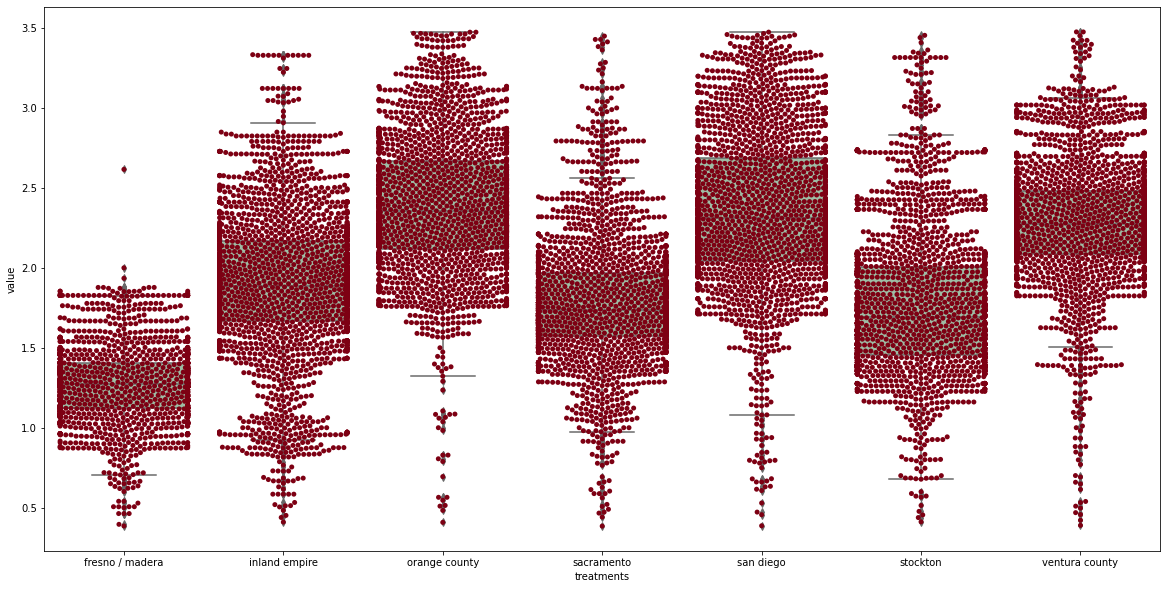

In [64]:

ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [65]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df_region['fresno / madera'], df_region['inland empire'], 
                                df_region['orange county'], df_region['sacramento'],
                                df_region['san diego'],df_region['stockton'],df_region['ventura county'])
print(fvalue, pvalue)

nan nan


In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq       df            F  PR(>F)
C(treatments)  2151.185707      6.0  2018.902716     0.0
Residual       2906.744619  16368.0          NaN     NaN

In [67]:
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

df       sum_sq     mean_sq            F  PR(>F)
C(treatments)      6.0  2151.185707  358.530951  2018.902716     0.0
Residual       16368.0  2906.744619    0.177587          NaN     NaN

In [68]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1          group2      Diff     Lower     Upper     q-value  \
0   fresno / madera   inland empire  0.623875  0.586657  0.661093   69.900953   
1   fresno / madera   orange county  1.120124  1.082019  1.158230  122.578758   
2   fresno / madera      sacramento  0.519383  0.481616  0.557150   57.347598   
3   fresno / madera       san diego  1.087815  1.049372  1.126259  117.996962   
4   fresno / madera        stockton  0.506590  0.469352  0.543828   56.729903   
5   fresno / madera  ventura county  1.017906  0.980766  1.055046  114.289046   
6     inland empire   orange county  0.496249  0.460267  0.532231   57.510801   
7     inland empire      sacramento  0.104493  0.068869  0.140116   12.231784   
8     inland empire       san diego  0.463940  0.427600  0.500280   53.237429   
9     inland empire        stockton  0.117285  0.082223  0.152347   13.949118   
10    inland empire  ventura county  0.394031  0.359073  0.428989   47.002618   
11    orange county      sacramento  0.600742  0.564192  0.637291   68.539754   
12    orange county       san diego  0.032309 -0.004940  0.069557    3.617041   
13    orange county        stockton  0.613534  0.577531  0.649537   71.062810   
14    orange county  ventura county  0.102218  0.066317  0.138120   11.872840   
15       sacramento       san diego  0.568433  0.531531  0.605334   64.234794   
16       sacramento        stockton  0.012793 -0.022851  0.048436    1.496618   
17       sacramento  ventura county  0.498523  0.462981  0.534065   58.490472   
18        san diego        stockton  0.581225  0.544865  0.617585   66.658928   
19        san diego  ventura county  0.069910  0.033650  0.106169    8.039847   
20         stockton  ventura county  0.511316  0.476337  0.546295   60.956568   

    p-value  
0     0.001  
1     0.001  
2     0.001  
3     0.001  
4     0.001  
5     0.001  
6     0.001  
7     0.001  
8     0.001  
9     0.001  
10    0.001  
11    0.001  
12    0.139  
13    0.001  
14    0.001  
15    0.001  
16    0.900  
17    0.001  
18    0.001  
19    0.001  
20    0.001

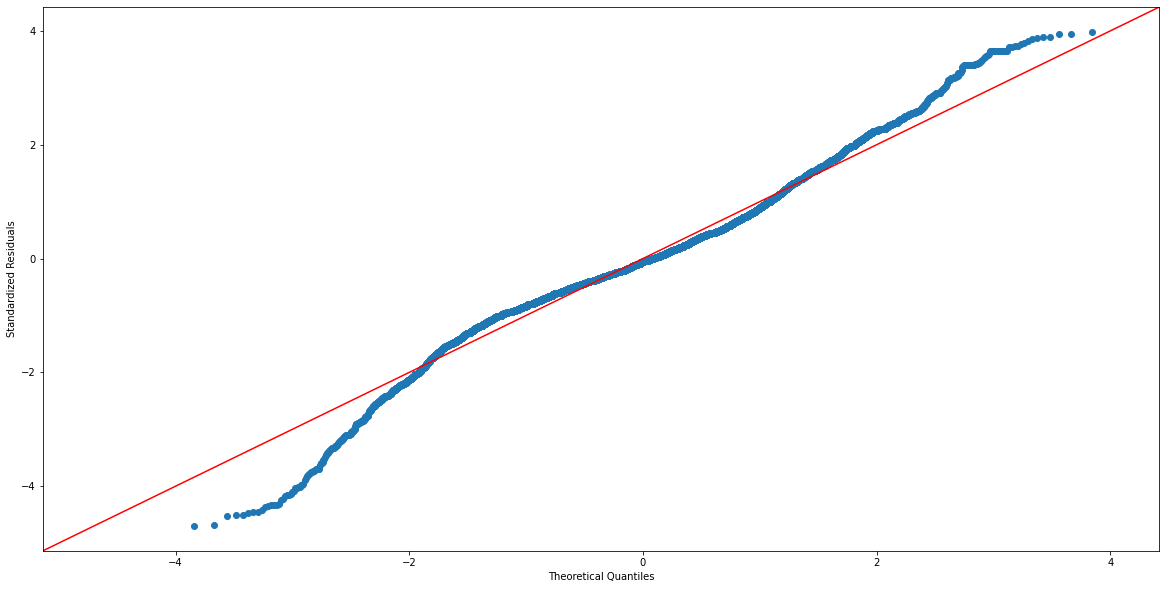

In [69]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

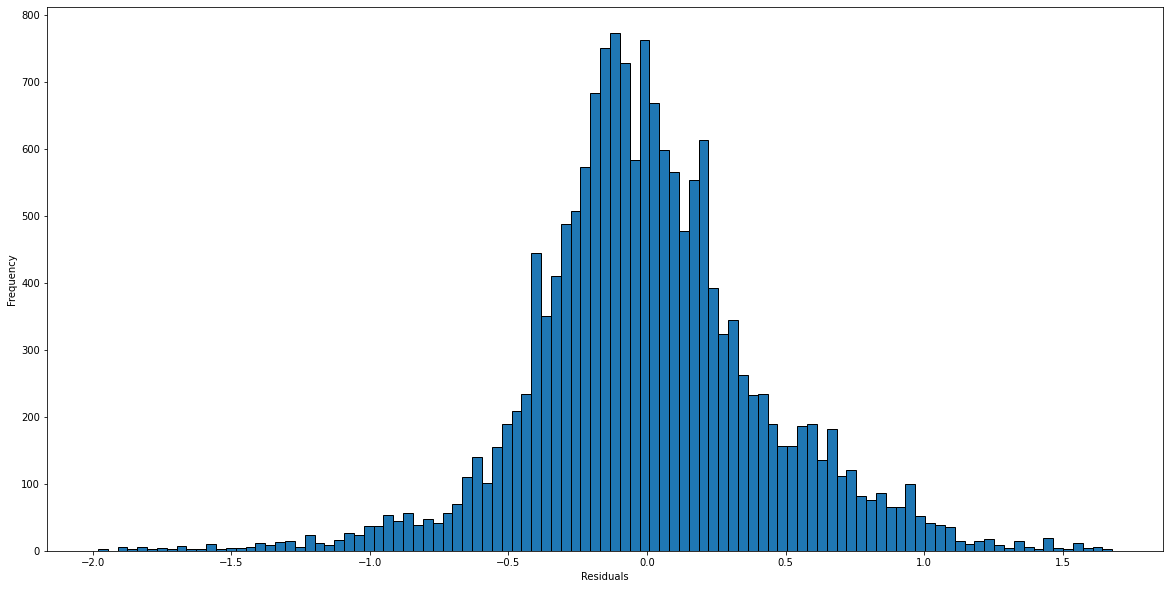

In [70]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed

In [71]:
temp2 = df.groupby('parking_options').count().reset_index()
lst2 = temp2[temp2['rental_rates/sqft'] >= 2000]['parking_options'].tolist()

parking = region[region['parking_options'].isin(lst2)]
parking

region  laundry_options  parking_options  pets_allowed  \
50      sacramento      w/d in unit  attached garage          True   
58      sacramento      w/d in unit          Unknown          True   
77      sacramento      w/d in unit  attached garage          True   
155     sacramento      w/d hookups  attached garage         False   
207     sacramento  laundry on site          carport          True   
...            ...              ...              ...           ...   
384754  sacramento      w/d hookups  attached garage         False   
384926  sacramento  laundry on site          carport          True   
384945  sacramento  laundry on site          carport          True   
384958  sacramento      w/d in unit          carport          True   
384970  sacramento      w/d in unit          carport          True   

        rental_rates/sqft  rental_rates_yearly/sqft  
50               1.386139                 16.633663  
58               2.065593                 24.787112  
77               1.970387                 23.644647  
155              1.540909                 18.490909  
207              1.975581                 23.706977  
...                   ...                       ...  
384754           1.777778                 21.333333  
384926           0.854037                 10.248447  
384945           1.881271                 22.575251  
384958           1.671875                 20.062500  
384970           1.636060                 19.632721  

[16163 rows x 6 columns]

In [72]:
new2 = parking[['parking_options','rental_rates/sqft']].reset_index().drop('index',axis = 1)
new2

parking_options  rental_rates/sqft
0      attached garage           1.386139
1              Unknown           2.065593
2      attached garage           1.970387
3      attached garage           1.540909
4              carport           1.975581
...                ...                ...
16158  attached garage           1.777778
16159          carport           0.854037
16160          carport           1.881271
16161          carport           1.671875
16162          carport           1.636060

[16163 rows x 2 columns]

In [73]:
lst2

['Unknown',
 'attached garage',
 'carport',
 'detached garage',
 'off-street parking']

In [74]:
new2_Unknown = new2[new2['parking_options'] == 'Unknown'].reset_index().drop('index',axis = 1)['rental_rates/sqft']
new2_attached = new2[new2['parking_options'] == 'attached garage'].reset_index().drop('index',axis = 1)['rental_rates/sqft']
new2_carport = new2[new2['parking_options'] == 'carport'].reset_index().drop('index',axis = 1)['rental_rates/sqft']
new2_detached = new2[new2['parking_options'] == 'detached garage'].reset_index().drop('index',axis = 1)['rental_rates/sqft']
new2_off_street = new2[new2['parking_options'] == 'off-street parking'].reset_index().drop('index',axis = 1)['rental_rates/sqft']

In [75]:
dic2 = {'Unknown':new2_Unknown,
 'attached garage':new2_attached,
 'carport':new2_carport,
 'detached garage':new2_detached,
 'off-street parking':new2_off_street}

In [76]:
df_parking = pd.DataFrame(data = dic2)
df_parking

Unknown  attached garage   carport  detached garage  off-street parking
0     2.065593         1.386139  1.975581         3.052550            1.408451
1     1.511438         1.970387  1.918528         1.623077            1.408451
2     1.511438         1.540909  1.975581         1.876943            1.408451
3     2.136207         1.540909  2.602083         1.715415            1.408451
4     2.136207         1.195122  2.602083         1.813800            2.071429
...        ...              ...       ...              ...                 ...
6765       NaN              NaN  2.188623              NaN                 NaN
6766       NaN              NaN  0.854037              NaN                 NaN
6767       NaN              NaN  1.881271              NaN                 NaN
6768       NaN              NaN  1.671875              NaN                 NaN
6769       NaN              NaN  1.636060              NaN                 NaN

[6770 rows x 5 columns]

In [77]:
df_melt = pd.melt(df_parking.reset_index(), id_vars=['index'], value_vars=['Unknown',
 'attached garage',
 'carport',
 'detached garage',
 'off-street parking'])
df_melt.columns = ['index', 'treatments', 'value']
df_melt.dropna()

index          treatments     value
0          0             Unknown  2.065593
1          1             Unknown  1.511438
2          2             Unknown  1.511438
3          3             Unknown  2.136207
4          4             Unknown  2.136207
...      ...                 ...       ...
28135   1055  off-street parking  2.076923
28136   1056  off-street parking  2.581667
28137   1057  off-street parking  2.850000
28138   1058  off-street parking  2.000000
28139   1059  off-street parking  2.653061

[16163 rows x 3 columns]

c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


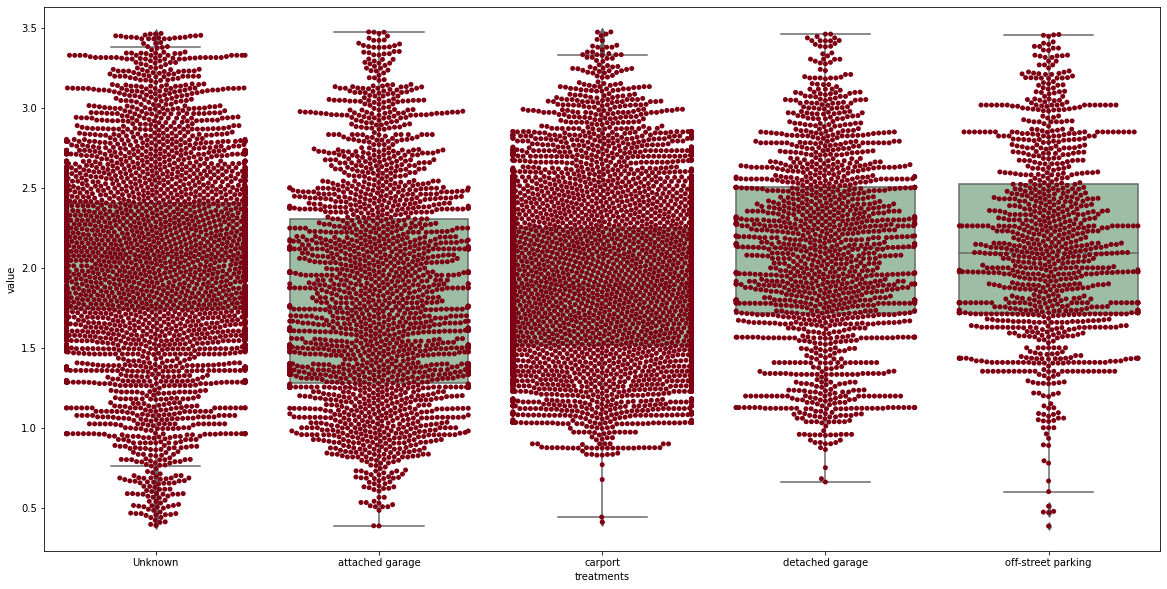

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [79]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df_region['fresno / madera'], df_region['inland empire'], 
                                df_region['orange county'], df_region['sacramento'],
                                df_region['san diego'],df_region['stockton'],df_region['ventura county'])
print(fvalue, pvalue)

nan nan


In [80]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq       df           F         PR(>F)
C(treatments)   161.903580      4.0  135.797115  2.562154e-114
Residual       4816.078117  16158.0         NaN            NaN

In [81]:
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

df       sum_sq    mean_sq           F         PR(>F)
C(treatments)      4.0   161.903580  40.475895  135.797115  2.562154e-114
Residual       16158.0  4816.078117   0.298062         NaN            NaN

#### Form above two tables, we can see that the p value is 0.0 which is lower than 0.05, and therefore, we can conclude that there are significant differences among treatments.

In [82]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1              group2      Diff     Lower     Upper  \
0          Unknown     attached garage  0.232325  0.193597  0.271053   
1          Unknown             carport  0.146113  0.117769  0.174457   
2          Unknown     detached garage  0.046781  0.002615  0.090947   
3          Unknown  off-street parking  0.082939  0.032259  0.133619   
4  attached garage             carport  0.086212  0.049446  0.122979   
5  attached garage     detached garage  0.279106  0.229115  0.329096   
6  attached garage  off-street parking  0.315264  0.259435  0.371093   
7          carport     detached garage  0.192893  0.150437  0.235350   
8          carport  off-street parking  0.229052  0.179854  0.278249   
9  detached garage  off-street parking  0.036158 -0.023571  0.095888   

     q-value   p-value  
0  23.144163  0.001000  
1  19.888257  0.001000  
2   4.086480  0.031615  
3   6.313857  0.001000  
4   9.046570  0.001000  
5  21.540269  0.001000  
6  21.786452  0.001000  
7  17.528307  0.001000  
8  17.962296  0.001000  
9   2.335538  0.465648

#### To be more specific, after the pairwise comparision test above, we can find that almost all p-values are less than 0.05 such that we reject the null hypothesis. So the means rental_rates/sqft are different, except detached garage & off-street parking.

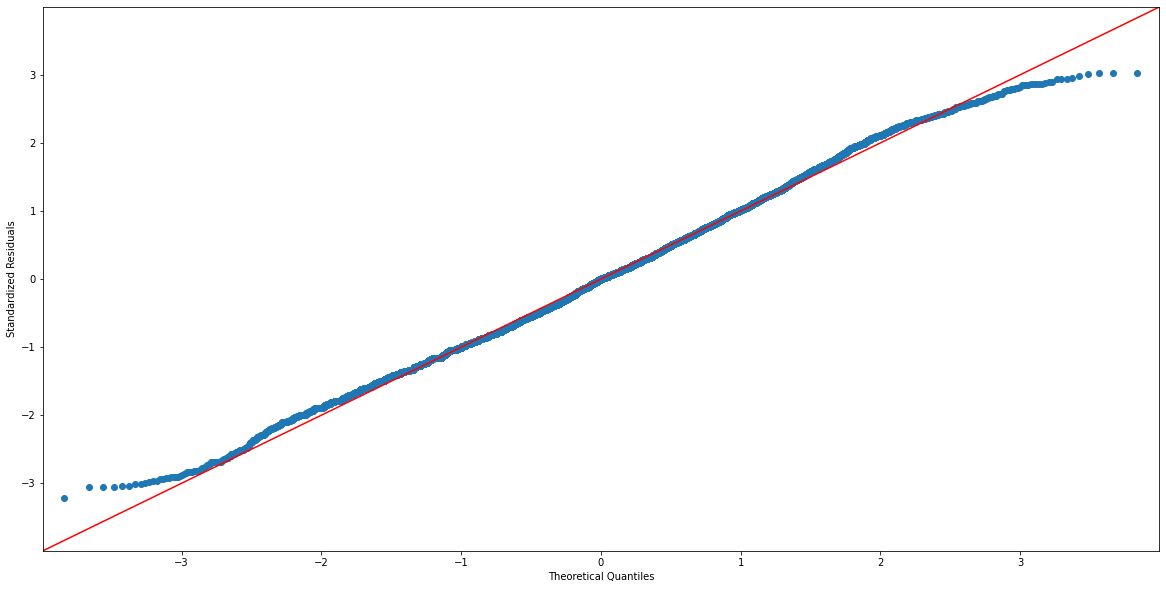

In [83]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

As the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed

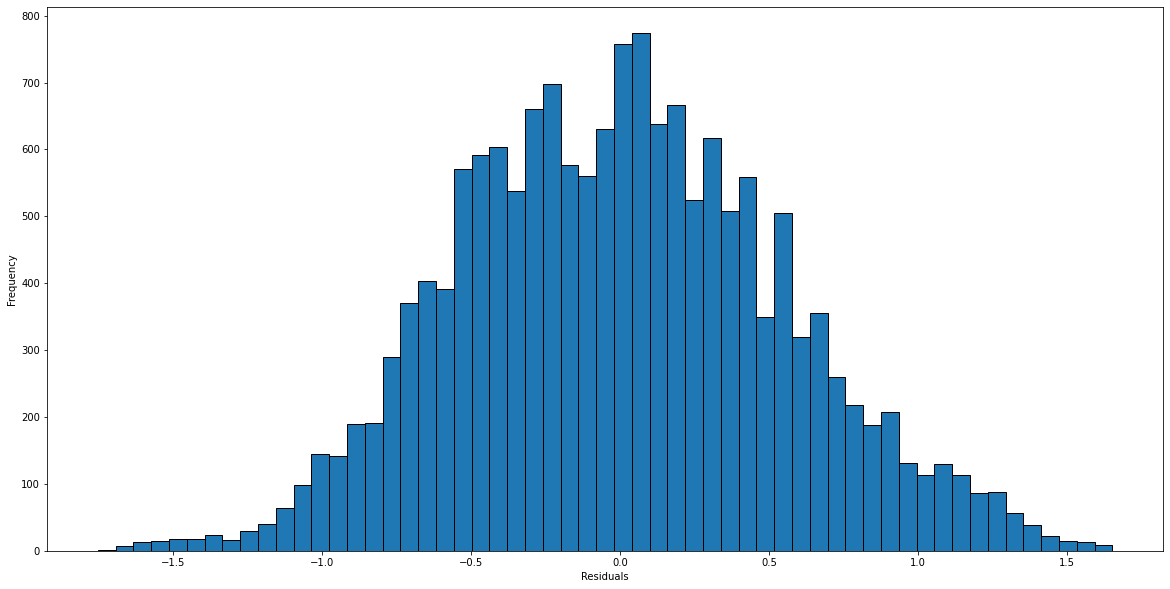

In [84]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed

In [85]:
temp3 = df.groupby('laundry_options').count().reset_index()
lst3 = temp3[temp3['rental_rates/sqft'] >= 2000]['laundry_options'].tolist()

laundry = region[region['laundry_options'].isin(lst3)]
laundry

region  laundry_options  parking_options  pets_allowed  \
50      sacramento      w/d in unit  attached garage          True   
58      sacramento      w/d in unit          Unknown          True   
77      sacramento      w/d in unit  attached garage          True   
155     sacramento      w/d hookups  attached garage         False   
207     sacramento  laundry on site          carport          True   
...            ...              ...              ...           ...   
384926  sacramento  laundry on site          carport          True   
384938  sacramento      w/d in unit   street parking         False   
384945  sacramento  laundry on site          carport          True   
384958  sacramento      w/d in unit          carport          True   
384970  sacramento      w/d in unit          carport          True   

        rental_rates/sqft  rental_rates_yearly/sqft  
50               1.386139                 16.633663  
58               2.065593                 24.787112  
77               1.970387                 23.644647  
155              1.540909                 18.490909  
207              1.975581                 23.706977  
...                   ...                       ...  
384926           0.854037                 10.248447  
384938           1.083333                 13.000000  
384945           1.881271                 22.575251  
384958           1.671875                 20.062500  
384970           1.636060                 19.632721  

[15765 rows x 6 columns]

In [86]:
new3 = parking[['laundry_options','rental_rates/sqft']].reset_index().drop('index',axis = 1)
new3

laundry_options  rental_rates/sqft
0          w/d in unit           1.386139
1          w/d in unit           2.065593
2          w/d in unit           1.970387
3          w/d hookups           1.540909
4      laundry on site           1.975581
...                ...                ...
16158      w/d hookups           1.777778
16159  laundry on site           0.854037
16160  laundry on site           1.881271
16161      w/d in unit           1.671875
16162      w/d in unit           1.636060

[16163 rows x 2 columns]

In [87]:
lst3

['Unknown', 'laundry on site', 'w/d hookups', 'w/d in unit']

In [88]:
new3_Unknown = new3[new3['laundry_options'] == 'Unknown'].reset_index().drop('index',axis = 1)['rental_rates/sqft']
new3_laundry_on_site = new3[new3['laundry_options'] == 'laundry on site'].reset_index().drop('index',axis = 1)['rental_rates/sqft']
new3_whookups = new3[new3['laundry_options'] == 'w/d hookups'].reset_index().drop('index',axis = 1)['rental_rates/sqft']
new3_wunit = new3[new3['laundry_options'] == 'w/d in unit'].reset_index().drop('index',axis = 1)['rental_rates/sqft']


In [89]:
dic3 = {'Unknown':new3_Unknown, 'laundry on site':new3_laundry_on_site, 'w/d hookups':new3_whookups, 'w/d in unit':new3_wunit}

In [90]:
df_laundry = pd.DataFrame(data = dic3)
df_laundry

Unknown  laundry on site  w/d hookups  w/d in unit
0     1.688679         1.975581     1.540909     1.386139
1     1.608491         1.408451     1.540909     2.065593
2     2.693674         1.975581     1.195122     1.970387
3     1.958042         1.408451     1.623077     1.918528
4     1.748718         1.511438     1.446945     2.602083
...        ...              ...          ...          ...
6983       NaN              NaN          NaN     2.240461
6984       NaN              NaN          NaN     2.370201
6985       NaN              NaN          NaN     1.537692
6986       NaN              NaN          NaN     1.671875
6987       NaN              NaN          NaN     1.636060

[6988 rows x 4 columns]

In [91]:
df_melt = pd.melt(df_laundry.reset_index(), id_vars=['index'], value_vars=['Unknown', 'laundry on site', 'w/d hookups', 'w/d in unit'])
df_melt.columns = ['index', 'treatments', 'value']
df_melt.dropna()

index   treatments     value
0          0      Unknown  1.688679
1          1      Unknown  1.608491
2          2      Unknown  2.693674
3          3      Unknown  1.958042
4          4      Unknown  1.748718
...      ...          ...       ...
27947   6983  w/d in unit  2.240461
27948   6984  w/d in unit  2.370201
27949   6985  w/d in unit  1.537692
27950   6986  w/d in unit  1.671875
27951   6987  w/d in unit  1.636060

[15606 rows x 3 columns]

c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Us

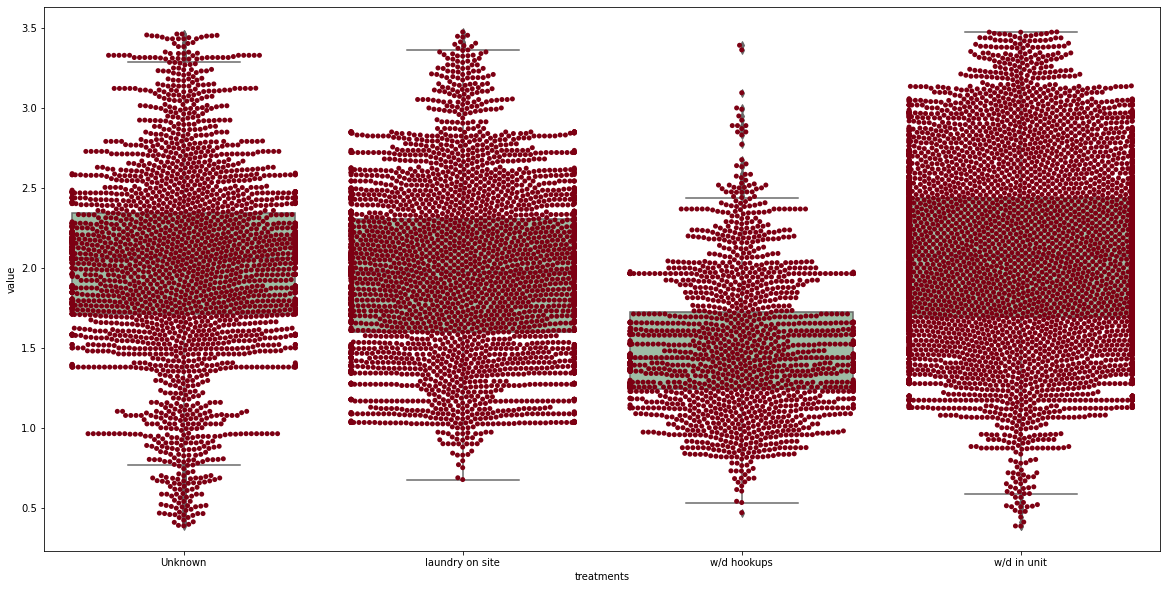

In [92]:

ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [93]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df_region['fresno / madera'], df_region['inland empire'], 
                                df_region['orange county'], df_region['sacramento'],
                                df_region['san diego'],df_region['stockton'],df_region['ventura county'])
print(fvalue, pvalue)

nan nan


In [94]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq       df          F  PR(>F)
C(treatments)   493.544214      3.0  594.17863     0.0
Residual       4319.843918  15602.0        NaN     NaN

In [95]:
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

df       sum_sq     mean_sq          F  PR(>F)
C(treatments)      3.0   493.544214  164.514738  594.17863     0.0
Residual       15602.0  4319.843918    0.276878        NaN     NaN

#### Form above two tables, we can see that the p value is 0.0 which is lower than 0.05, and therefore, we can conclude that there are significant differences among treatments.

In [96]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

c:\users\26319\appdata\local\programs\python\python39\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1           group2      Diff     Lower     Upper    q-value  \
0          Unknown  laundry on site  0.052300  0.019169  0.085430   5.735901   
1          Unknown      w/d hookups  0.519724  0.479461  0.559986  46.903187   
2          Unknown      w/d in unit  0.058363  0.028615  0.088111   7.128723   
3  laundry on site      w/d hookups  0.467424  0.429058  0.505789  44.268734   
4  laundry on site      w/d in unit  0.110663  0.083537  0.137788  14.823489   
5      w/d hookups      w/d in unit  0.578087  0.542601  0.613572  59.192805   

   p-value  
0    0.001  
1    0.001  
2    0.001  
3    0.001  
4    0.001  
5    0.001

#### To be more specific, after the pairwise comparision test above, we can find that almost all p-values are less than 0.05 such that we reject the null hypothesis. So the means rental_rates/sqft are different.

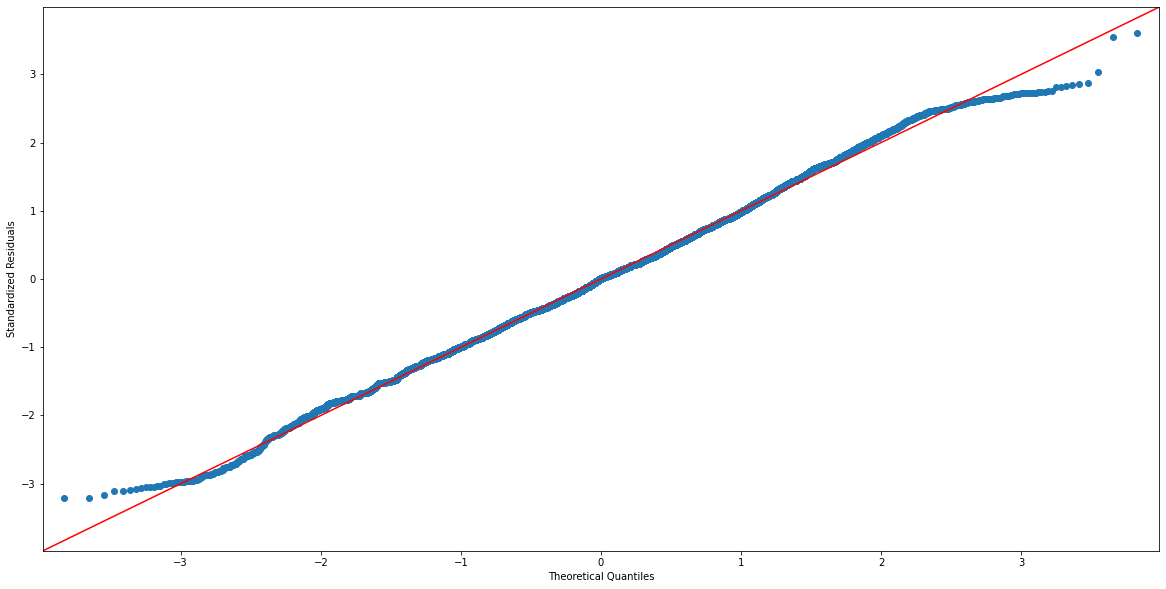

In [97]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

As the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed

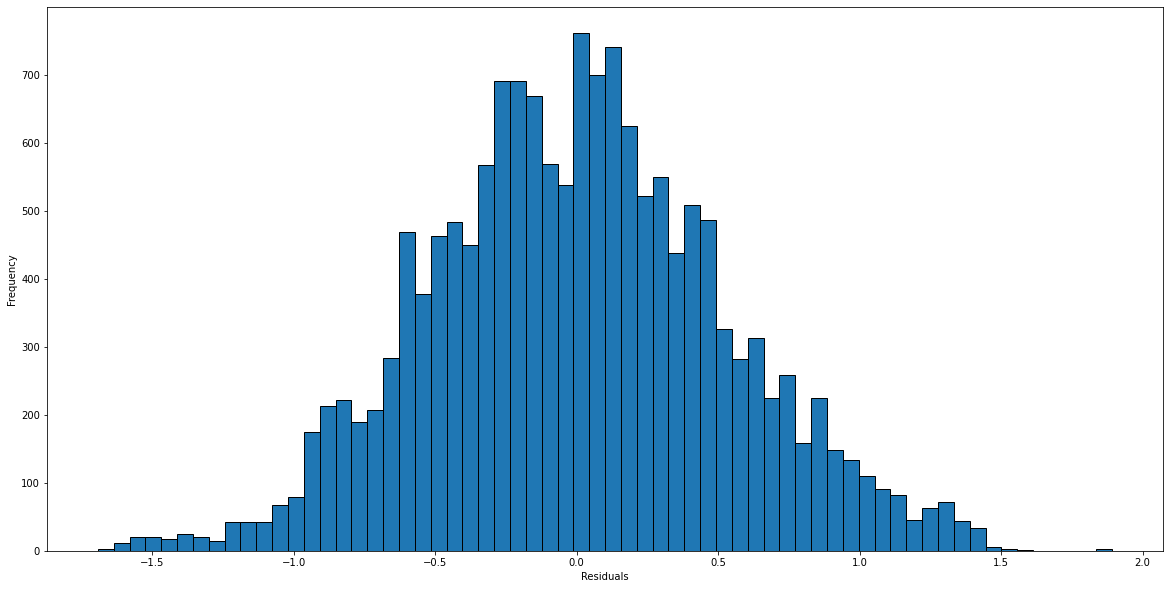

In [98]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed

### hypothesis test on the pets_allowed column

our null hypothesis is that the mean of yearly rental rates per square feet of houses that allow pets is the same as the mean of yearly rental rates per square feet of houses that do not allow pets. Our alternative hypothesis is that their mean are different.

In [99]:
new_grouped = df.groupby(["region","pets_allowed"]).mean().reset_index()[["region","pets_allowed","rental_rates_yearly/sqft"]]
new_grouped.head()

region  pets_allowed  rental_rates_yearly/sqft
0  SF bay area         False                 31.980611
1  SF bay area          True                 32.429253
2  bakersfield         False                 13.864132
3  bakersfield          True                 14.668331
4        chico         False                 16.548963

difference in mean between pets allowed and not allowed 
houses in SF bay area

In [100]:
observation = abs(new_grouped[new_grouped["region"] == "SF bay area"]["rental_rates_yearly/sqft"][0] -\
new_grouped[new_grouped["region"] == "SF bay area"]["rental_rates_yearly/sqft"][1])

In [101]:
output_lst = []
for i in range(500):
    sf_data = df[df["region"] == "SF bay area"]
    shuffled_labels = sf_data["pets_allowed"].sample(frac=1).values
    sf_data['Shuffled Label'] = shuffled_labels
    new_grouped = sf_data.groupby("Shuffled Label").mean().reset_index()
    new_grouped.head()
    new_mean_dif = abs(new_grouped["rental_rates_yearly/sqft"][0] - new_grouped["rental_rates_yearly/sqft"][1])
    output_lst.append(new_mean_dif)


C:\Users\26319\AppData\Local\Temp/ipykernel_38412/712699835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_data['Shuffled Label'] = shuffled_labels


In [102]:
empirical_p = np.count_nonzero(output_lst <= observation) / 500
empirical_p

0.808

So we fail to reject the null hypothesis that the mean of yearly rental rates per square feet of houses that allow pets is the same as the mean of yearly rental rates per square feet of houses that do not allow pets.

## OLS Regression 

In [103]:
df["new"] = df["rental_rates_yearly/sqft"]
out_val_1, pred_val_1 = patsy.dmatrices("new ~ laundry_options", df)
mod_val_1 = sm.OLS(out_val_1, pred_val_1)
res_val_1 = mod_val_1.fit()
print(res_val_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    new   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     449.3
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:17:05   Log-Likelihood:            -1.0363e+05
No. Observations:               30339   AIC:                         2.073e+05
Df Residuals:                   30333   BIC:                         2.073e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [104]:
df["new"] = df["rental_rates_yearly/sqft"]
out_val_1, pred_val_1 = patsy.dmatrices("new ~ parking_options", df)
mod_val_1 = sm.OLS(out_val_1, pred_val_1)
res_val_1 = mod_val_1.fit()
print(res_val_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    new   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     95.29
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          3.06e-138
Time:                        23:17:05   Log-Likelihood:            -1.0438e+05
No. Observations:               30339   AIC:                         2.088e+05
Df Residuals:                   30331   BIC:                         2.089e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [105]:
df["new"] = df["rental_rates_yearly/sqft"]
out_val_1, pred_val_1 = patsy.dmatrices("new ~ pets_allowed", df)
mod_val_1 = sm.OLS(out_val_1, pred_val_1)
res_val_1 = mod_val_1.fit()
print(res_val_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    new   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     319.5
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           4.34e-71
Time:                        23:17:05   Log-Likelihood:            -1.0456e+05
No. Observations:               30339   AIC:                         2.091e+05
Df Residuals:                   30337   BIC:                         2.091e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.7073 

All three regression results have p value less than 0.05, which indicates that there are some correlation between rental rates per square feet, parking options, laundry options and pets policy in California. However, the R squared in three models are low, which means that the independent variable is not explaining much in the variation of dependent variables(rental rates per squarefeet). Also, our previous research shows that it is hard to find a correlation between rental rates per square feet, parking options, laundry options and pets policy if we conduct test on the statistics in one specific region. 

## Ethics & Privacy


To begin with, our data does not reveal any personal information of the renters. With this being said, it can be concluded that our acquired data will not result in privacy issues or breach of individuals’ personal identifiable info. Besides, the objectivity of this data is, from our perspective, is relatively high as it contains merely the Californian housing info in 2020 (eg. rental price, locations, housing types, etc.), and it is certain that this data does not contain discrimination towards individual renters. In conclusion, our data is accessible, highly related to the question, sufficient enough to conduct reliable inferences, and, most importantly, highly objective.
The intent of our question is to investigate the relationship between three housing factors, including pets and smoking policies (ie. are having pets and smoking allowed) and housing type (eg. condo, apartment, etc.), and the housing rental rates in California through an accessible dataset on Kaggle and therefore we assert that our question is free from inappropriate intent and bias. Our question can be analyzed based on the facts and identities collected from dataset regarding the given housing list. In addition, we assert that our data and the tool we will be building are quite unlikely to be wrongly utilized for nefarious purposes, since the analyzed data and the result of our project aim to only demonstrate how the rental rates are influenced by the aforementioned housing factors. We acknowledge that we have confounding variables that exist: such as bedroom numbers, bathroom numbers, housing type. But by using rental price per square feet can minimize the impact on the results from bedroom, bathroom numbers and housing type.

## Conclusion & Discussion


The American rental housing market, which is generally characterized by “the heightened demand” & relatively “high property prices” (when compared to those of other countries) and well known for its tremendous size, has always been sparking people’s attention (Collins “The US Rental Property Market Outlook”). It is undeniable that examining the housing rental rates/prices through its influencing factors enables people to better perceive this aforementioned market. Our project focuses on the topic of the housing rental rates in California, the US, in the year of 2020, emphasizing the potential relationship between these housing rates and the factors of the geographical location and physical conditions & accessibility of the rental houses as well as the particular policy associated with the rental agreement. More specifically, in our research, we aim to examine how the monthly rental rate per square foot in the specific regions of California (those with more than 2000 rental houses) in 2020 may be impacted by the housing factors of of parking and laundry options (ie. what kinds of parking & laundry are available to renters) as well as the pet policies (ie. are dogs or cats allowed in housing), and this is achieved through our investigation and analysis of the data associated with the housing rental market.

We begin our project through acquiring the appropriate dataset. The dataset we eventually selected provides information about the housing rental market in the US in the year of 2020, containing the data of the monthly rental rates of different housing types across the cities in different US states and various housing features (ie. the variables in the dataset). After we derived this dataset (from Kaggle), we trimmed its variables down to only those that are useful to our examination and analysis: the pet policies, the housing factors of parking & laundry options, residential locations, house sizes (in square feet), and the monthly rental rates (in dollars), which are respectively presented as: “dogs_allowed” & “cats_allowed) “parking_options,”  “laundry_options,” , “region”, “sqfeet,” and “price.” Among these factors, only the first three variables (employed as the predictor variables) and the last variable (employed as the outcome variable) are those that we are really interested in and focus on. Through data cleaning, we dropped all the null values, adjusted the variable of the pet policy by the means of replacing the two separate variables that are stored in the original dataset with the new variable “pets_allowed,” and changed the lower & upper limits for the variables of “price” & “sqfeet” and eliminated their outliers. Last but not least, through dividing the monthly rental rate by the house size, we created a new variable named “rental_rates/sqft,” (ie. monthly rental rates per square foot–in dollars) and stored it in our dataset. After data cleaning, we proceeded with exploratory data analysis (EDA) on our dataset, presenting the pattern and basic features of the data, hence gaining insights on how different variables are related to one another. During the process of EDA, we further refined the exclusion of the outliers in the data, making our results become statistically significant, and reduced the cities (ie. observations of the “region” variable) to only those that contain more than 2000 rental houses. We then employed the boxplot to graph the average rental_rates/sqft of those cities that meet our aforementioned criterion. Besides, we multiplied the monthly rental rates per square feet by 12 to transform it into the yearly rental rates per square feet in order to make the data larger and easier to plot. Then, we generated different types of plots to exhibit the relationships between the following variable pairs separately: “pets_allowed” & “rental_rates/sqft,” “parking_options” & “rental_rates/sqft,” and “laundry_options” & “rental_rates/sqft.” It is worth mentioning that the relationship between each of these variable pairs is demonstrated by various plots. The plots overall reflect how the yearly rental rates in different cities are potentially impacted by the aforementioned predictive variables individually. After the exploratory data analysis, we conducted individual statistical tests on these variable pairs. Based on ANOVA test, we discovered that the average rental rates per square foot across all of these selected cities indeed are impacted by the housing factors of parking and laundry options (ie. what kinds of parking & laundry are available to renters) as well as the pet policies (ie. are dogs or cats allowed in housing). In other words, the average monthly rental rates in all of the selected cities that have more than 2000 rental houses are impacted by each of  the variables of the housing factors and pet policies as mentioned above (“pets_allowed,” “parking_options,” and “laundry_options”) . This finding is also supported by our OLS regression results at the end as the generated p-values are all small enough to indicate that the average monthly rental rates across all of those cities are affected by the aforementioned variables Yet, as we focused on each of these cities, we cannot find statistically significant results that can demonstrate the relationship between the monthly rental rates and each of the variables. This means that the average monthly rental rate in each of the selected cities is not affected by the variables of “pets_allowed,” “parking_options,” or “laundry_options” individually. 

The limitations of our project is that we only employed specific cities in California, and hence the data is not really inclusive, and it may be negatively impacted by this confound. Judging from this point, the results we derived from this project may not be generalizable to a broader rental housing market in the US. Besides, this project only focuses on the housing rental rates in the year of 2020. It is worth mentioning that during this year, the COVID pandemic is at its peak, which, to a very large extent, can significantly impact the rental housing market of the nation. As a result, this further undermines the generalizability of our results. Last but not least, the models being employed in this project, from our perspective, can be improved: we can add more types of models for the purpose of advancing the validity of our results. Regardless of the limitations as mentioned above, we believe that our project can still have some impacts on society. This is because the indication of how the housing conditions, including the size, accessibility, and equipment of the houses, as well as the housing options and policies may affect the price of housing rentals is particularly useful and important to those who are moving into the new areas and temporarily living there, such as college students, people traveling for business purpose, and so forth, as it provides critical information that enables those people to make the economically appropriate decisions on what particular kinds of houses they shall lease. Therefore, judging from the aforementioned point, the topic of how the housing rental market can be potentially impacted by those factors as mentioned above seems to be highly relatable to us as well as many other college students. 



## Team Contributions


- Lihao Liu: Dealing with outliers in EDA, finding relation between "parking options" and "rental_rates_yearly/sqft". Performing chi-squared test.

- Zhenjian Wang: Data cleaning and create new variables as needed.EDA bar chart and multiple line chart in analysis part. Linear regression model.
- Qinyi Zhang: Prior Work, Variable explanation, Data Cleaning, Ethics and Privacy.
- Jialong Guo: Overview, Conclusion, EDA analysis.
- Zehui Zhang: Looking for the relationships between variables in EDA and related graphs plotted and interpretations. Anova Test in two different methods in region, parking_options and laundry options, with the interpretations and analysis. And data distribution analysis.

